In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(0, '/Users/coreywalker/Desktop/NOAA/SCANAnalysis/SCAN-scripts/')#for my Macbook 
#sys.path.insert(0, '/rhome/cwalker/Desktop/repositories/SCANAnalysis/SCAN-scripts/')#for my Linux Machine

In [2]:
from datasets import SM_VS_ESI_ANOM_READ, SCAN_META_READ, DROUGHT_READ, SCAN_SIG_READ, SOILS_READ

In [3]:
SM_VS_ESI_ANOM_READ

,Date,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM
0,2002-04-30,-0.527,2057:AL:SCAN,18,18,-1.839516,-2.608769,-2.434962,-2.084585,-1.598313
1,2002-05-21,1.565,2057:AL:SCAN,21,21,-0.349508,-1.356723,-1.702116,-1.692849,-0.663807
2,2002-05-28,1.484,2057:AL:SCAN,22,22,-0.234778,-0.972001,-1.546049,-1.441618,-0.890192
3,2002-06-11,0.419,2057:AL:SCAN,24,24,-1.524178,-1.680948,-1.660611,-1.608081,-0.872815
4,2002-06-18,1.374,2057:AL:SCAN,25,25,-0.737961,-1.484239,-2.253738,-2.101628,-0.901292
...,...,...,...,...,...,...,...,...,...,...
9669,2020-12-02,1.522,2053:AL:SCAN,49,49,NaN,-0.038652,0.551961,0.416028,-1.223196
9670,2020-12-09,1.082,2053:AL:SCAN,50,50,NaN,-0.628406,0.522642,0.541675,-0.954042
9671,2020-12-16,0.068,2053:AL:SCAN,51,51,NaN,-0.564758,0.286017,0.215204,-0.923545
9672,2020-12-23,0.167,2053:AL:SCAN,52,52,NaN,-0.662174,0.122894,-0.009764,0.495781


In [4]:
#create percent rank of sm anomalies 
SM_VS_ESI_ANOM_READ['2in_pr'] = SM_VS_ESI_ANOM_READ['2inANOM'].rank(pct=True) * 100.0
SM_VS_ESI_ANOM_READ['4in_pr'] = SM_VS_ESI_ANOM_READ['4inANOM'].rank(pct=True) * 100.0
SM_VS_ESI_ANOM_READ['8in_pr'] = SM_VS_ESI_ANOM_READ['8inANOM'].rank(pct=True) * 100.0
SM_VS_ESI_ANOM_READ['20in_pr'] = SM_VS_ESI_ANOM_READ['20inANOM'].rank(pct=True) * 100.0
SM_VS_ESI_ANOM_READ['40in_pr'] = SM_VS_ESI_ANOM_READ['40inANOM'].rank(pct=True) * 100.0

In [5]:
def droughtLabel(percent_rank):
    #this function takes in a percent rank (float) and returns a drought category (float)
    if (percent_rank <= 30.0) & (percent_rank>=21.0):
        return 0.0
    elif (percent_rank > 30.0):
        return np.nan
    elif (percent_rank <= 20.0) & (percent_rank>=11.0):
        return 1.0
    elif (percent_rank <= 10.0) & (percent_rank>=6.0):
        return 2.0
    elif (percent_rank <=5.0) & (percent_rank>=3.0):
        return 3.0
    elif (percent_rank <=3.0):
        return 4.0

In [6]:
#get the drought category for percent rank (DC) for soil moisture stations (SMS)
SM_VS_ESI_ANOM_READ['2inSMSDC'] = SM_VS_ESI_ANOM_READ['2in_pr'].apply(droughtLabel)
SM_VS_ESI_ANOM_READ['4inSMSDC'] = SM_VS_ESI_ANOM_READ['4in_pr'].apply(droughtLabel)
SM_VS_ESI_ANOM_READ['8inSMSDC'] = SM_VS_ESI_ANOM_READ['8in_pr'].apply(droughtLabel)
SM_VS_ESI_ANOM_READ['20inSMSDC']= SM_VS_ESI_ANOM_READ['20in_pr'].apply(droughtLabel)
SM_VS_ESI_ANOM_READ['40inSMSDC']= SM_VS_ESI_ANOM_READ['40in_pr'].apply(droughtLabel)

In [7]:
#what is the average ESI for each drought category?
depths = []
category = []
averageESI = []

for i in ['2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC']:
    droughtFrame = SM_VS_ESI_ANOM_READ[[i, "ESI"]]
    for j in droughtFrame[i].unique():
        categoryFrame = droughtFrame[droughtFrame[i]==j]
        if np.isnan(j):
            pass
        else:
            avgESI = categoryFrame['ESI'].mean()
            depths.append(i)
            category.append(j)
            averageESI.append(avgESI)

df = pd.DataFrame()
df['depth'] = depths
df['category']=category
df['meanESI']=averageESI

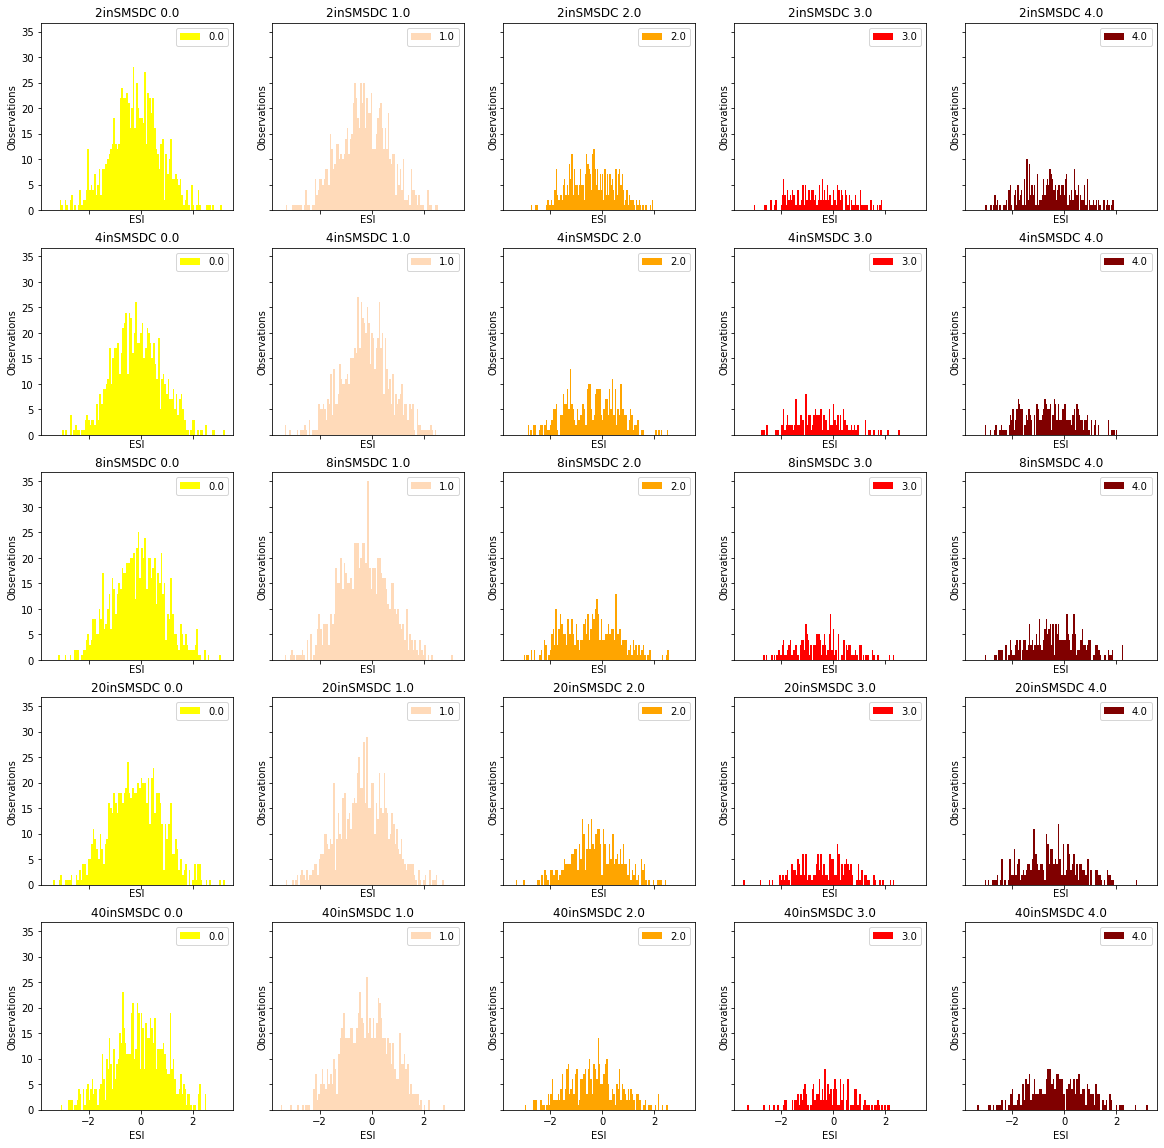

In [8]:
#what is the variability for each category?
fig, ax = plt.subplots(figsize=(20,20),nrows=5, ncols=5, sharey=True, sharex=True)
axes = ax.flatten()
count = 0
colorKey = {0:"yellow",1:"peachpuff",2:"orange",3:"red",4:"maroon"}
for i in ['2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC']:
    droughtFrame = SM_VS_ESI_ANOM_READ[[i, "ESI"]]
    for c in [0.0, 1.0, 2.0, 3.0, 4.0]:
        categoryFrame=droughtFrame[droughtFrame[i]==c]
        if np.isnan(c):
            pass
        else:
            axes[count].hist(categoryFrame['ESI'], label=c, bins=100, color=colorKey.get(c))
            axes[count].legend()
            axes[count].set_title(i + " " + str(c))
            axes[count].set_ylabel("Observations")
            axes[count].set_xlabel("ESI")
            count+=1
          

In [9]:
df.sort_values(["depth", "category"], inplace=True)

Text(0.5, 0, 'Drought Category')

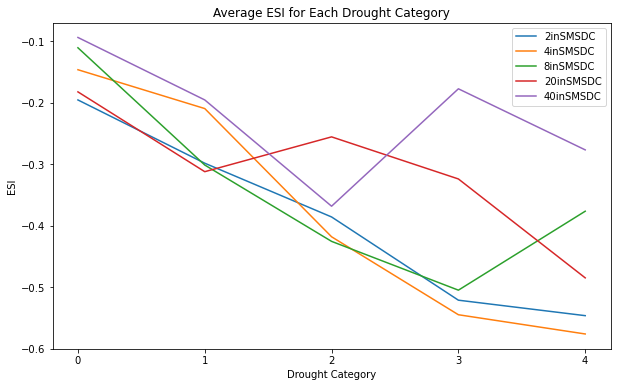

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
for i in ['2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC']:
    depthFrame = df[df['depth']==i]
    plotFrame = depthFrame.set_index('category')
    ax.plot(plotFrame['meanESI'], label=i)
    ax.legend()
ax.xaxis.set_ticks([0,1,2,3,4])
ax.set_title("Average ESI for Each Drought Category")
ax.set_ylabel("ESI")
ax.set_xlabel("Drought Category")

In [11]:
scanTriplets = SCAN_META_READ[['station', 'Station Name']]

In [12]:
DROUGHT_READ.rename(columns={'station_names':'Station Name', 'date':'Date'}, inplace=True)

In [13]:
drought_data = DROUGHT_READ.merge(scanTriplets, on='Station Name')

In [14]:
DM_test = drought_data[drought_data['station']=='2056:AL:SCAN']
ESI_test = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']=='2056:AL:SCAN']
SMSDM_test = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']=='2056:AL:SCAN']
ESI_test['Date']=pd.to_datetime(ESI_test['Date'], format='%Y-%m-%d')
SMSDM_test['Date']=pd.to_datetime(SMSDM_test['Date'], format='%Y-%m-%d')

/var/folders/y9/hh5gbzrj2yb99_tywtn0r8s80000gn/T/ipykernel_20482/3058360447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESI_test['Date']=pd.to_datetime(ESI_test['Date'], format='%Y-%m-%d')
/var/folders/y9/hh5gbzrj2yb99_tywtn0r8s80000gn/T/ipykernel_20482/3058360447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMSDM_test['Date']=pd.to_datetime(SMSDM_test['Date'], format='%Y-%m-%d')


In [15]:
#set the index
DM_test.set_index('Date', inplace=True)
ESI_test.set_index('Date', inplace=True)
SMSDM_test.set_index('Date', inplace=True)

In [16]:
#lets look at drought year 
DM_test = DM_test[(DM_test.index.year==2012) | (DM_test.index.year==2013)]
ESI_test = ESI_test[(ESI_test.index.year==2012)|(ESI_test.index.year==2013)]
SMSDM_test = SMSDM_test[(SMSDM_test.index.year==2012)|(SMSDM_test.index.year==2013)]

In [17]:
DM_test.sort_index(inplace=True)
ESI_test.sort_index(inplace=True)
SMSDM_test.sort_index(inplace=True)

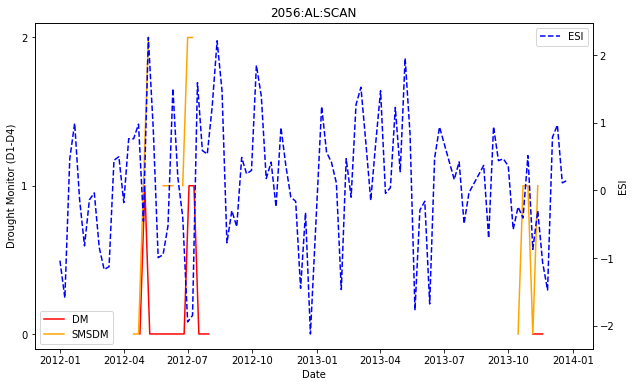

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(DM_test['Category'], label='DM', color='red')
ax.plot()
ax2 = ax.twinx()
ax2.plot(ESI_test['ESI'], label='ESI', linestyle='dashed', color='blue')
ax2.legend()
ax.set_ylabel('Drought Monitor (D1-D4)')
ax2.set_ylabel('ESI')
ax.set_xlabel('Date')
ax.set_title(DM_test['station'].unique().item())
ax.plot(SMSDM_test['4inSMSDC'], label="SMSDM", color='orange')
ax.legend(loc='lower left')
ax.yaxis.set_ticks([0,1,2])

In [19]:
SMSDM_test

,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,2in_pr,4in_pr,8in_pr,20in_pr,40in_pr,2inSMSDC,4inSMSDC,8inSMSDC,20inSMSDC,40inSMSDC
Date,,,,,,,,,,,,,,,,,,,
2012-01-01,-1.036,2056:AL:SCAN,52,52,0.530074,0.773755,0.901517,0.398306,1.263294,66.677599,77.002967,82.548998,62.741899,92.298303,NaN,NaN,NaN,NaN,NaN
2012-01-08,-1.587,2056:AL:SCAN,1,1,-1.129205,-0.240322,0.653609,0.331736,1.538225,13.392369,39.659895,73.469162,59.484698,96.753326,1.0,NaN,NaN,NaN,NaN
2012-01-15,0.468,2056:AL:SCAN,2,2,0.607961,0.629268,1.104360,0.340749,1.342732,69.935498,70.623145,88.506256,59.957246,93.848407,NaN,NaN,NaN,NaN,NaN
2012-01-22,0.993,2056:AL:SCAN,3,3,0.137346,0.442041,1.572774,0.285516,1.345538,52.629277,63.558548,96.966006,57.493249,93.897229,NaN,NaN,NaN,NaN,NaN
2012-01-29,-0.133,2056:AL:SCAN,4,4,0.576963,0.714880,1.379145,0.468891,1.394955,68.743850,74.503538,94.474588,65.948470,94.751617,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-26,-1.470,2056:AL:SCAN,48,48,-1.189684,-0.243622,-2.253057,-0.765908,NaN,11.916475,39.557179,0.996567,21.703420,NaN,1.0,NaN,4.0,0.0,NaN
2013-12-03,0.788,2056:AL:SCAN,49,49,-1.167394,-0.160547,-1.002094,0.101743,NaN,12.419372,42.353344,15.867567,49.662466,NaN,1.0,NaN,1.0,NaN,NaN
2013-12-10,0.966,2056:AL:SCAN,50,50,0.123019,0.591791,-0.861794,0.564228,NaN,52.038920,69.322073,19.577013,69.846985,NaN,NaN,NaN,1.0,NaN,NaN


In [20]:
#now we are goin to test cumulative fall for drought 2007
DM_test = drought_data[drought_data['station']=='2078:AL:SCAN']
ESI_test = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']=='2078:AL:SCAN']
SMSDM_test = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']=='2078:AL:SCAN']

In [21]:
DM_test.set_index('Date', inplace=True)
ESI_test.set_index('Date', inplace=True)
SMSDM_test.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

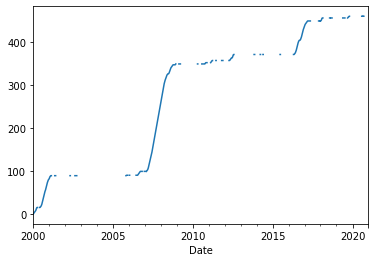

In [22]:
DM_test['Category'].cumsum().plot()

In [23]:
#fixing datetime
ESI_test.index = pd.to_datetime(ESI_test.index)

<AxesSubplot:xlabel='Date'>

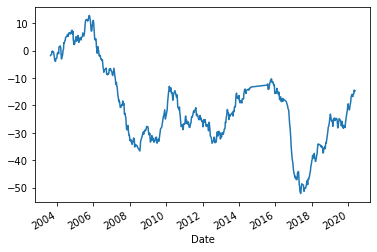

In [24]:
ESI_test['ESI'].cumsum().plot()

In [25]:
#fixing datetime
SMSDM_test.index = pd.to_datetime(SMSDM_test.index)

Text(0.5, 0, 'Date')

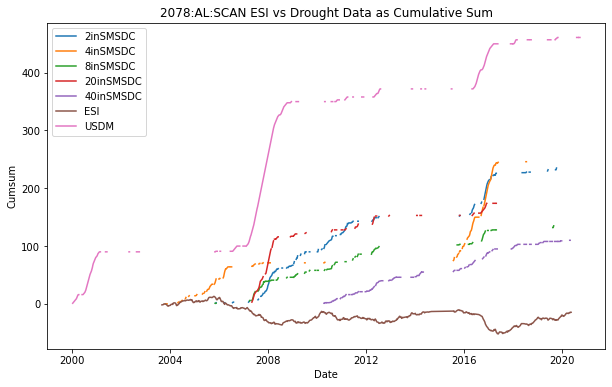

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(SMSDM_test['2inSMSDC'].cumsum(), label='2inSMSDC')
ax.plot(SMSDM_test['4inSMSDC'].cumsum(), label='4inSMSDC')
ax.plot(SMSDM_test['8inSMSDC'].cumsum(), label='8inSMSDC')
ax.plot(SMSDM_test['20inSMSDC'].cumsum(), label='20inSMSDC')
ax.plot(SMSDM_test['40inSMSDC'].cumsum(), label='40inSMSDC')
ax.plot(ESI_test['ESI'].cumsum(), label='ESI')
ax.plot(DM_test['Category'].cumsum(), label='USDM')
ax.legend()
ax.set_title('2078:AL:SCAN ESI vs Drought Data as Cumulative Sum')
ax.set_ylabel('Cumsum')
ax.set_xlabel('Date')

Text(0.5, 1.0, '2078:AL:SCAN Drought Categroy vs ESI Raw Data')

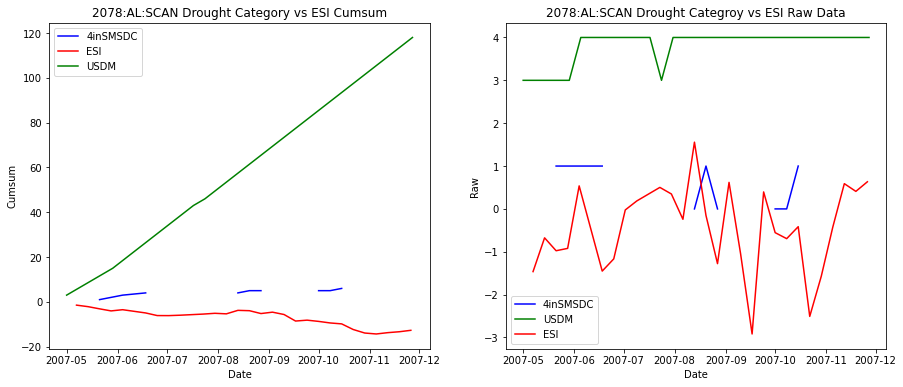

In [27]:
fig, ax = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)
ax[0].plot(SMSDM_test[(SMSDM_test.index.month>=5) & (SMSDM_test.index.month<=11) & (SMSDM_test.index.year==2007)]['4inSMSDC'].cumsum(), label='4inSMSDC', color='blue')
ax[0].plot(ESI_test[(ESI_test.index.month>=5) & (ESI_test.index.month<=11) & (ESI_test.index.year==2007)]['ESI'].cumsum(), label='ESI', color='red')
ax[0].plot(DM_test[(DM_test.index.month>=5) & (DM_test.index.month<=11) & (DM_test.index.year==2007)]['Category'].cumsum(), label='USDM', color='green')
ax[0].legend()
ax[1].plot(SMSDM_test[(SMSDM_test.index.month>=5) & (SMSDM_test.index.month<=11) & (SMSDM_test.index.year==2007)]['4inSMSDC'], label='4inSMSDC', color='blue')
ax[1].plot(DM_test[(DM_test.index.month>=5) & (DM_test.index.month<=11) & (DM_test.index.year==2007)]['Category'], label='USDM', color='green')
ax[1].plot(ESI_test[(ESI_test.index.month>=5) & (ESI_test.index.month<=11) & (ESI_test.index.year==2007)]['ESI'], label='ESI', color='red')
ax[1].legend()
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Cumsum')
ax[0].set_title('2078:AL:SCAN Drought Category vs ESI Cumsum')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Raw')
ax[1].set_title('2078:AL:SCAN Drought Categroy vs ESI Raw Data')

In [28]:
DM_test[(DM_test.index.month>=5) & (DM_test.index.month<=11) & (DM_test.index.year==2007)]

,point,Category,Station Name,station
Date,,,,
2007-05-01,POINT (-86.60236 34.89375),3.0,Bragg Farm,2078:AL:SCAN
2007-05-08,POINT (-86.60236 34.89375),3.0,Bragg Farm,2078:AL:SCAN
2007-05-15,POINT (-86.60236 34.89375),3.0,Bragg Farm,2078:AL:SCAN
2007-05-22,POINT (-86.60236 34.89375),3.0,Bragg Farm,2078:AL:SCAN
2007-05-29,POINT (-86.60236 34.89375),3.0,Bragg Farm,2078:AL:SCAN
2007-06-05,POINT (-86.60236 34.89375),4.0,Bragg Farm,2078:AL:SCAN
2007-06-12,POINT (-86.60236 34.89375),4.0,Bragg Farm,2078:AL:SCAN
2007-06-19,POINT (-86.60236 34.89375),4.0,Bragg Farm,2078:AL:SCAN
2007-06-26,POINT (-86.60236 34.89375),4.0,Bragg Farm,2078:AL:SCAN


Text(0, 0.5, 'Drought Category')

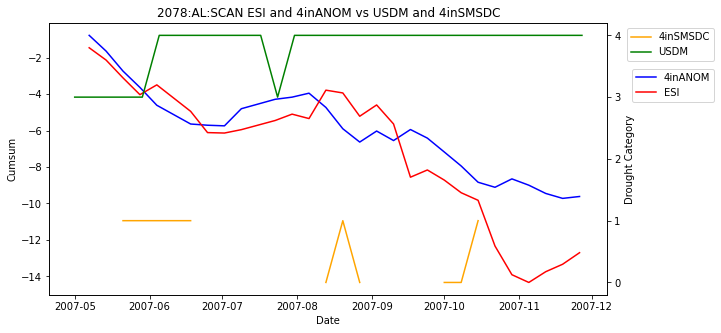

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(SMSDM_test[(SMSDM_test.index.month>=5) & (SMSDM_test.index.month<=11) & (SMSDM_test.index.year==2007)]['4inANOM'].cumsum(), label='4inANOM', color='blue')
ax.plot(ESI_test[(ESI_test.index.month>=5) & (ESI_test.index.month<=11) & (ESI_test.index.year==2007)]['ESI'].cumsum(), label='ESI', color='red')
ax2=ax.twinx()
ax2.plot(SMSDM_test[(SMSDM_test.index.month>=5) & (SMSDM_test.index.month<=11) & (SMSDM_test.index.year==2007)]['4inSMSDC'], label='4inSMSDC', color='orange')
ax2.plot(DM_test[(DM_test.index.month>=5) & (DM_test.index.month<=11) & (DM_test.index.year==2007)]['Category'], label='USDM', color='green')
ax.set_xlabel('Date')
ax.set_ylabel('Cumsum')
ax.set_title('2078:AL:SCAN ESI and 4inANOM vs USDM and 4inSMSDC')
ax2.legend(bbox_to_anchor=(1.20, 1.0), loc='upper right')
ax.legend(bbox_to_anchor=(1.20, 0.85), loc='upper right')
ax2.yaxis.set_ticks([0, 1, 2, 3, 4])
ax2.set_ylabel('Drought Category')

<AxesSubplot:xlabel='Date'>

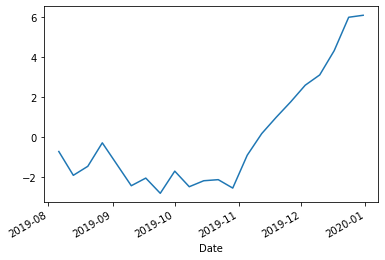

In [30]:
ESI_test[(ESI_test.index.month >= 8) & (ESI_test.index.year==2019)]['ESI'].cumsum().plot()

<AxesSubplot:xlabel='Date'>

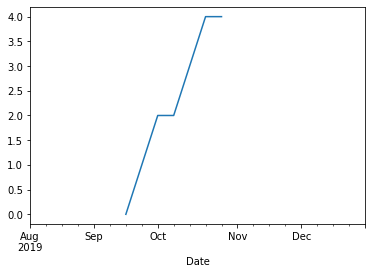

In [31]:
DM_test[(DM_test.index.month >= 8) & (DM_test.index.year==2019)]['Category'].cumsum().plot() 

In [32]:
DM_test[(DM_test.index.month >= 8) & (DM_test.index.year==2019)]['Category'].cumsum()

Date
2019-08-06    NaN
2019-08-13    NaN
2019-08-20    NaN
2019-08-27    NaN
2019-09-03    NaN
2019-09-10    NaN
2019-09-17    0.0
2019-09-24    1.0
2019-10-01    2.0
2019-10-08    2.0
2019-10-15    3.0
2019-10-22    4.0
2019-10-29    4.0
2019-11-05    NaN
2019-11-12    NaN
2019-11-19    4.0
2019-11-26    NaN
2019-12-03    NaN
2019-12-10    NaN
2019-12-17    NaN
2019-12-24    NaN
2019-12-31    NaN
Name: Category, dtype: float64

<AxesSubplot:xlabel='Date'>

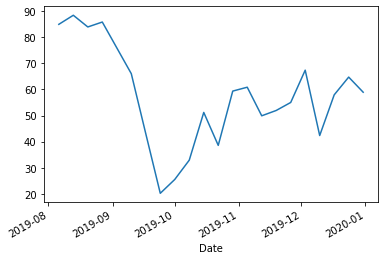

In [33]:
SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['4in_pr'].plot()

<AxesSubplot:xlabel='Date'>

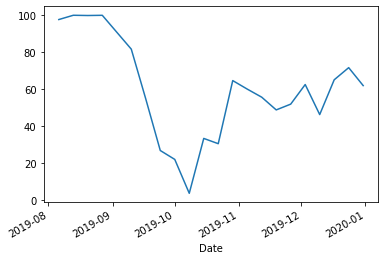

In [34]:
SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['2in_pr'].plot()

In [35]:
SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]

,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,2in_pr,4in_pr,8in_pr,20in_pr,40in_pr,2inSMSDC,4inSMSDC,8inSMSDC,20inSMSDC,40inSMSDC
Date,,,,,,,,,,,,,,,,,,,
2019-08-06,-0.731,2078:AL:SCAN,32,32,1.638670,0.991352,-0.100813,0.823698,-0.569001,97.398054,84.866469,43.450338,80.186769,29.842549,NaN,NaN,NaN,NaN,0.0
2019-08-13,-1.194,2078:AL:SCAN,33,33,2.173916,1.104749,-2.118304,NaN,-0.485669,99.704821,88.335996,1.428413,NaN,32.478945,NaN,NaN,4.0,NaN,NaN
2019-08-20,0.452,2078:AL:SCAN,34,34,2.108838,0.962681,-0.703471,0.686324,-0.547122,99.573631,83.862132,24.128004,74.392439,30.562675,NaN,NaN,0.0,NaN,NaN
2019-08-27,1.177,2078:AL:SCAN,35,35,2.167247,1.012472,-1.753205,0.750613,-0.322283,99.682956,85.745264,3.454767,77.160216,38.178933,NaN,NaN,3.0,NaN,NaN
2019-09-10,-2.151,2078:AL:SCAN,37,37,0.897431,0.506653,1.942781,0.243146,-0.663474,81.447469,66.000913,99.069870,55.591809,26.925424,NaN,NaN,NaN,NaN,0.0
2019-09-17,0.383,2078:AL:SCAN,38,38,0.194134,-0.140454,2.001121,0.007580,-0.749250,54.597136,43.038119,99.169527,46.253375,23.983889,NaN,NaN,NaN,NaN,0.0
2019-09-24,-0.763,2078:AL:SCAN,39,39,-0.651359,-0.855910,1.437879,-0.099714,-0.680483,26.833935,20.246519,95.371498,42.664266,26.498230,0.0,NaN,NaN,NaN,0.0
2019-10-01,1.111,2078:AL:SCAN,40,40,-0.808681,-0.684659,1.663948,-0.286388,-0.766384,22.029081,25.542114,97.730041,36.318632,23.459050,0.0,0.0,NaN,NaN,0.0
2019-10-08,-0.781,2078:AL:SCAN,41,41,-1.686217,-0.455703,1.833979,-0.402388,-0.742904,3.771728,32.926273,98.638025,32.673267,24.191383,3.0,NaN,NaN,NaN,0.0


Text(0.5, 1.0, '2078:AL:SCAN Flash Drought Event')

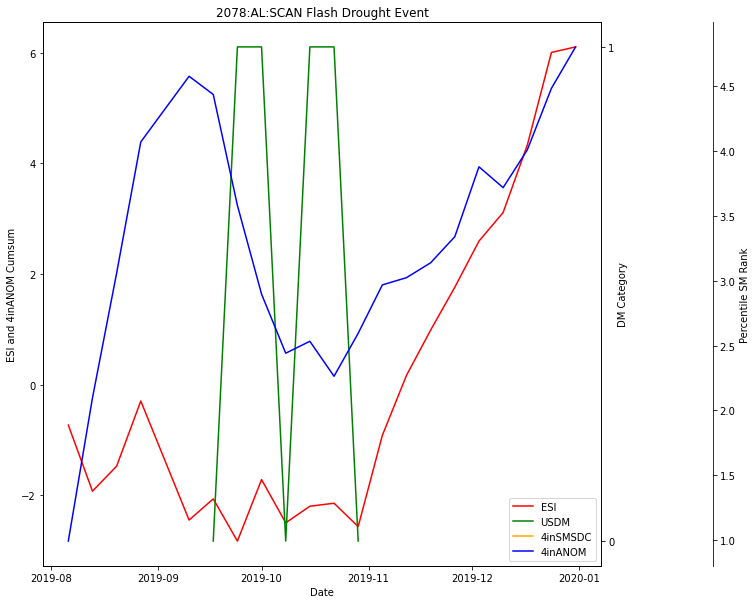

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
esi, = ax.plot(ESI_test[(ESI_test.index.month >= 8) & (ESI_test.index.year==2019)]['ESI'].cumsum(), label="ESI", color='red')
ax2 = ax.twinx()
ax2.yaxis.set_ticks([0, 1, 2, 3, 4])
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.2))
dm, = ax2.plot(DM_test[(DM_test.index.month >= 8) & (DM_test.index.year==2019)]['Category'], label="USDM", color='green')
smdm, = ax2.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['4inSMSDC'], label="4inSMSDC", color='orange')
sm4, = ax3.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['4inANOM'].cumsum(), label="4inANOM", color='blue')

#smdm2, = ax2.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['2inSMSDC'], label="2inSMDC", color='yellow')
ax.legend(handles=[esi, dm, smdm, sm4], loc='lower right')
ax.set_xlabel('Date')
ax2.set_ylabel('DM Category')
ax3.set_ylabel('Percentile SM Rank')
ax.set_ylabel('ESI and 4inANOM Cumsum')
ax.set_title('2078:AL:SCAN Flash Drought Event')

In [37]:
SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['4inSMSDC']

Date
2019-08-06    NaN
2019-08-13    NaN
2019-08-20    NaN
2019-08-27    NaN
2019-09-10    NaN
2019-09-17    NaN
2019-09-24    NaN
2019-10-01    0.0
2019-10-08    NaN
2019-10-15    NaN
2019-10-22    NaN
2019-10-29    NaN
2019-11-05    NaN
2019-11-12    NaN
2019-11-19    NaN
2019-11-26    NaN
2019-12-03    NaN
2019-12-10    NaN
2019-12-17    NaN
2019-12-24    NaN
2019-12-31    NaN
Name: 4inSMSDC, dtype: float64

Text(0.5, 1.0, '2078:AL:SCAN Flash Drought Event')

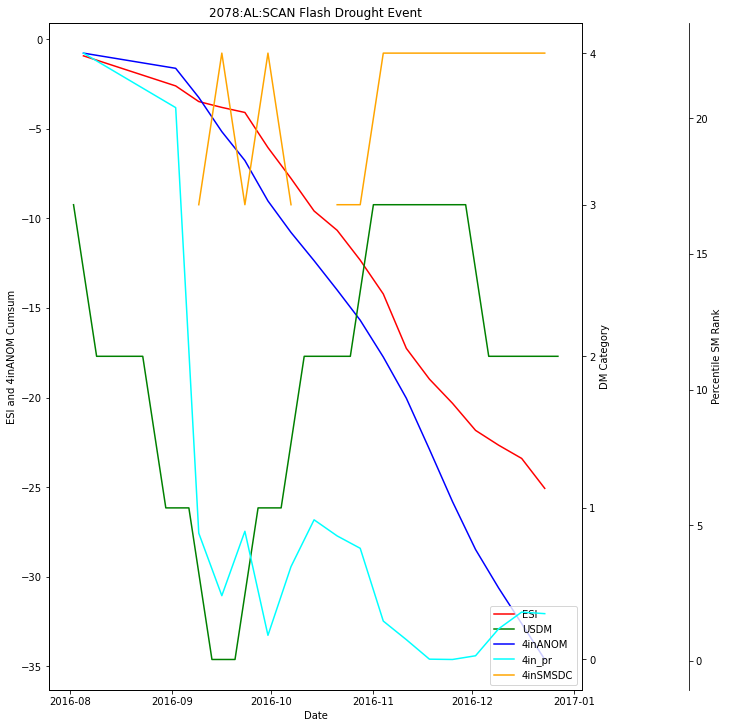

In [38]:
fig, ax = plt.subplots(figsize=(10,10), constrained_layout=True)
esi, = ax.plot(ESI_test[(ESI_test.index.month >= 8) & (ESI_test.index.year==2016)]['ESI'].cumsum(), label="ESI", color='red')
ax2 = ax.twinx()
ax2.set_yticks([0, 1, 2, 3, 4]) 
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.2))
dm, = ax2.plot(DM_test[(DM_test.index.month >= 8) & (DM_test.index.year==2016)]['Category'], label="USDM", color='green')
smdm, = ax2.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2016)]['4inSMSDC'], label="4inSMSDC", color='orange')
sm4, = ax.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2016)]['4inANOM'].cumsum(), label="4inANOM", color='blue')
smpr4, = ax3.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2016)]['4in_pr'], label="4in_pr", color='cyan')
ax.legend(handles=[esi, dm, sm4, smpr4, smdm], loc='lower right')
ax.set_xlabel('Date')
ax2.set_ylabel('DM Category')
ax3.set_ylabel('Percentile SM Rank')
ax.set_ylabel('ESI and 4inANOM Cumsum')
ax.set_title('2078:AL:SCAN Flash Drought Event')

In [39]:
ESI_test

,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,2in_pr,4in_pr,8in_pr,20in_pr,40in_pr,2inSMSDC,4inSMSDC,8inSMSDC,20inSMSDC,40inSMSDC
Date,,,,,,,,,,,,,,,,,,,
2003-08-27,-1.783,2078:AL:SCAN,35,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-09-10,0.396,2078:AL:SCAN,37,37,2.164270,0.998736,1.390679,2.639969,1.948964,99.661091,85.140379,94.662828,99.966247,99.279873,NaN,NaN,NaN,NaN,NaN
2003-09-17,0.035,2078:AL:SCAN,38,38,1.314586,0.670494,0.635382,2.320282,1.586560,93.254619,72.380735,72.727273,99.842484,97.253753,NaN,NaN,NaN,NaN,NaN
2003-09-24,1.165,2078:AL:SCAN,39,39,1.862839,0.846438,1.246991,2.889176,1.446026,98.720892,79.833371,91.828147,99.988749,95.483950,NaN,NaN,NaN,NaN,NaN
2003-10-01,0.046,2078:AL:SCAN,40,40,1.779189,0.627369,1.333774,2.580136,1.672270,98.283590,70.554668,93.422655,99.954995,98.047113,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-15,-0.105,2078:AL:SCAN,16,16,1.448394,0.598713,3.116271,1.197821,-0.174465,95.331803,69.550331,99.778541,91.415392,42.646161,NaN,NaN,NaN,NaN,NaN
2020-04-22,0.244,2078:AL:SCAN,17,17,1.529283,0.737754,3.218922,1.277831,-0.579650,96.239204,75.450810,99.889270,93.103060,29.537410,NaN,NaN,NaN,NaN,0.0
2020-04-29,1.244,2078:AL:SCAN,18,18,1.442555,0.962767,3.190488,1.020041,-0.582725,95.244342,83.884958,99.844978,86.701170,29.464177,NaN,NaN,NaN,NaN,0.0


In [40]:
drought_data['Date']=pd.to_datetime(drought_data['Date'])

In [41]:
drought_data.set_index('Date', inplace=True)

In [42]:
flash_2019 = drought_data[(drought_data.index.year==2019)&(drought_data.index.month>=8)]

In [43]:
SM_VS_ESI_ANOM_READ['Date']=pd.to_datetime(SM_VS_ESI_ANOM_READ['Date'])

In [44]:
SM_VS_ESI_ANOM_READ.set_index('Date', inplace=True)

In [45]:
SM_ESI_flash_2019 = SM_VS_ESI_ANOM_READ[(SM_VS_ESI_ANOM_READ.index.year==2019)&(SM_VS_ESI_ANOM_READ.index.month>=8)]

In [46]:
SM_ESI_flash_2019

,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,2in_pr,4in_pr,8in_pr,20in_pr,40in_pr,2inSMSDC,4inSMSDC,8inSMSDC,20inSMSDC,40inSMSDC
Date,,,,,,,,,,,,,,,,,,,
2019-08-06,0.581,2057:AL:SCAN,32,32,-0.320020,0.553622,0.785686,0.961752,1.143419,37.279983,67.792741,78.651312,84.777228,89.271329,NaN,NaN,NaN,NaN,NaN
2019-08-13,0.210,2057:AL:SCAN,33,33,-0.262023,0.853190,0.985721,0.998732,1.210929,39.198644,80.015978,84.962906,85.969847,91.212010,NaN,NaN,NaN,NaN,NaN
2019-08-20,-0.333,2057:AL:SCAN,34,34,-1.076246,0.525206,0.761227,1.012649,1.018275,14.649612,66.697101,77.854058,86.374887,85.316734,1.0,NaN,NaN,NaN,NaN
2019-08-27,-0.945,2057:AL:SCAN,35,35,-0.780767,0.251437,0.542510,0.906686,0.841734,22.750629,56.493951,69.084265,82.740774,78.908825,0.0,NaN,NaN,NaN,NaN
2019-09-03,-1.315,2057:AL:SCAN,36,36,-0.866953,0.155705,0.471759,0.566161,0.510153,20.454794,53.332572,66.050271,69.903240,65.897718,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-03,-0.640,2053:AL:SCAN,49,49,1.150144,1.130342,1.101391,0.734631,1.250638,89.625014,89.226204,88.461964,76.462646,92.029782,NaN,NaN,NaN,NaN,NaN
2019-12-10,0.140,2053:AL:SCAN,50,50,1.031959,0.992935,1.385743,0.975073,1.056672,85.995408,84.923533,94.607463,85.182268,86.451849,NaN,NaN,NaN,NaN,NaN
2019-12-17,0.213,2053:AL:SCAN,51,51,0.535768,0.429769,0.578262,0.550751,0.735964,66.950913,63.102031,70.479460,69.273177,74.551446,NaN,NaN,NaN,NaN,NaN


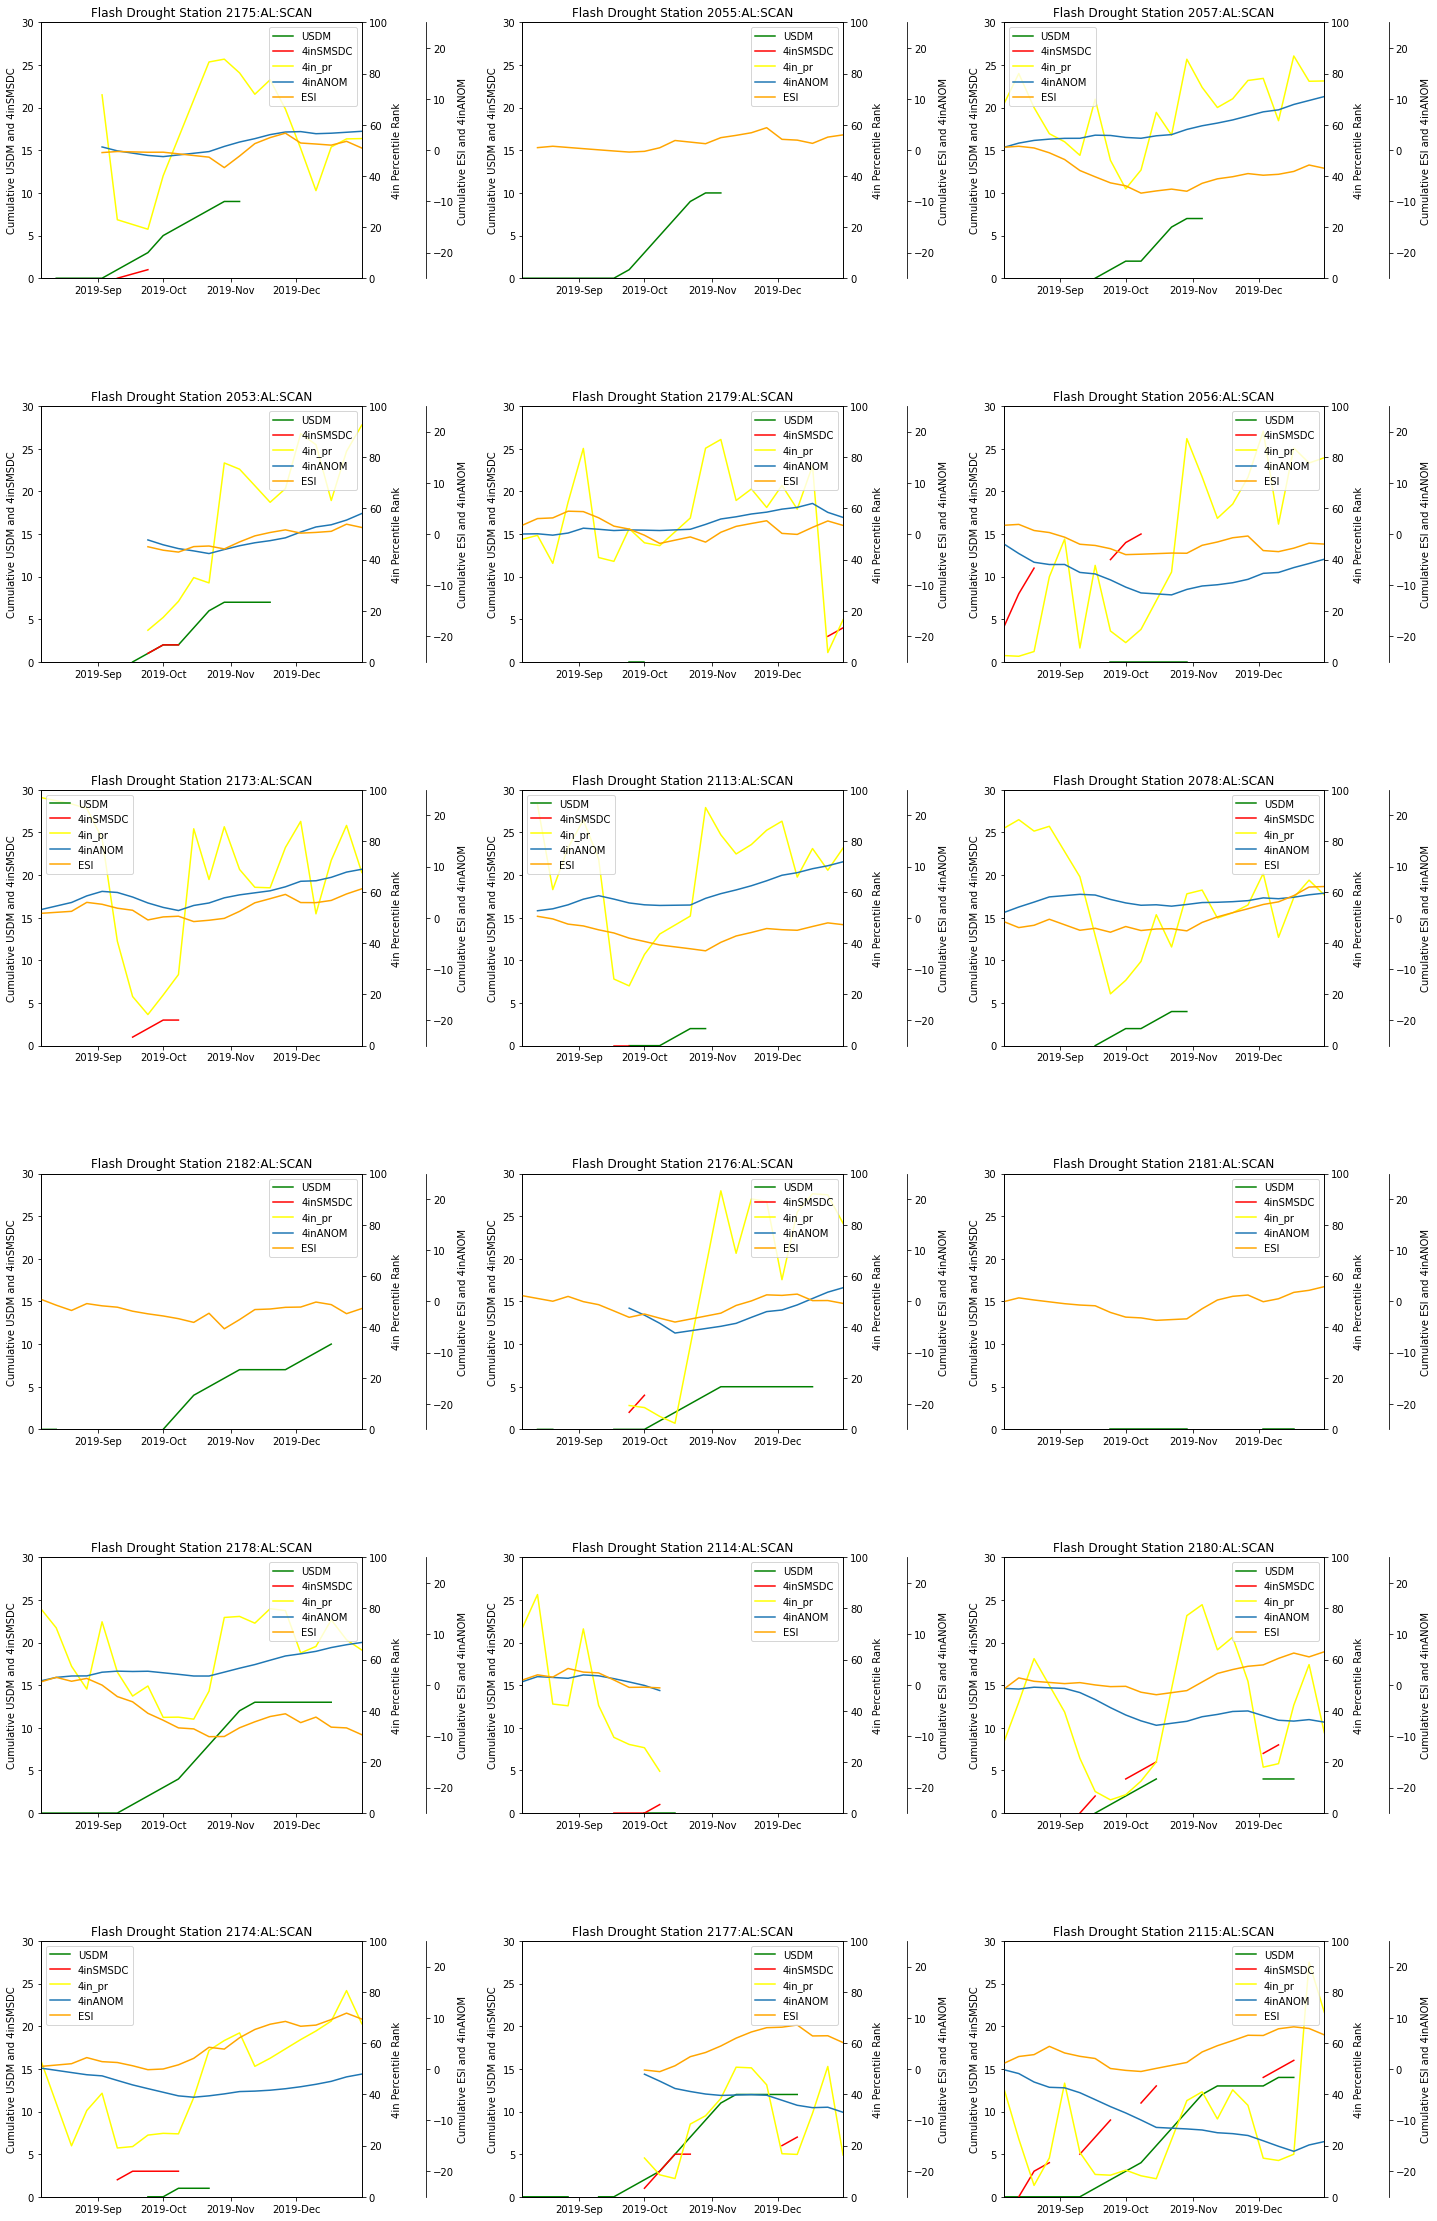

In [47]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(23,40), nrows=6, ncols=3)
axes = ax.flatten()
count = 0
for s in flash_2019['station'].unique():
    USDM = flash_2019[flash_2019['station']==s]['Category']
    xticks = [month for month in USDM.index.month]
    USDM_h, = axes[count].plot(USDM.cumsum(), label='USDM', color='green')
    axes[count].set_xlim(USDM.index[0], USDM.index[-1])
    axes[count].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axes[count].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    axes[count].set_title('Flash Drought Station '+ s)
    axes[count].set_ylabel('Cumulative USDM and 4inSMSDC')
    
    #plot the actual sm drought category
    sm4inDC = SM_ESI_flash_2019[SM_ESI_flash_2019['station']==s]['4inSMSDC']
    smdc, = axes[count].plot(sm4inDC.cumsum(), label='4inSMSDC', color='red')
    axes[count].set_ylim(0, 30)
    
    #now lets plot pr for sm
    axes2 = axes[count].twinx()
    smpr, = axes2.plot(SM_ESI_flash_2019[SM_ESI_flash_2019['station']==s]['4in_pr'], label='4in_pr', color='yellow')
    axes2.set_ylim(0,100)
    axes2.set_ylabel('4in Percentile Rank')
    
    #now lets plot SM cumsum
    axes3 = axes[count].twinx()
    axes3.spines.right.set_position(("axes", 1.2))
    sms4ANOM, = axes3.plot(SM_ESI_flash_2019[SM_ESI_flash_2019['station']==s]['4inANOM'].cumsum(), label='4inANOM')
    axes3.set_ylim(-25,25)
    
    #now lets plot ESI cumsum
    ESI, = axes3.plot(SM_ESI_flash_2019[SM_ESI_flash_2019['station']==s]['ESI'].cumsum(), label='ESI', color='orange')
    axes3.legend(handles=[USDM_h, smdc, smpr, sms4ANOM, ESI])
    axes3.set_ylabel('Cumulative ESI and 4inANOM')
    count+=1
plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [48]:
SM_ESI_flash_2019.reset_index(inplace=True)

In [49]:
flash_2019.reset_index(inplace=True)

In [50]:
combined = SM_ESI_flash_2019.merge(flash_2019, on=['station', 'Date'])

In [51]:
combined.set_index('Date', inplace=True)

In [52]:
df = combined[(combined.index.month>=8)&(combined.index.month<=12)]
df.columns

Index(['ESI', 'station', 'week_x', 'week_y', '2inANOM', '4inANOM', '8inANOM',
       '20inANOM', '40inANOM', '2in_pr', '4in_pr', '8in_pr', '20in_pr',
       '40in_pr', '2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC',
       'point', 'Category', 'Station Name'],
      dtype='object')

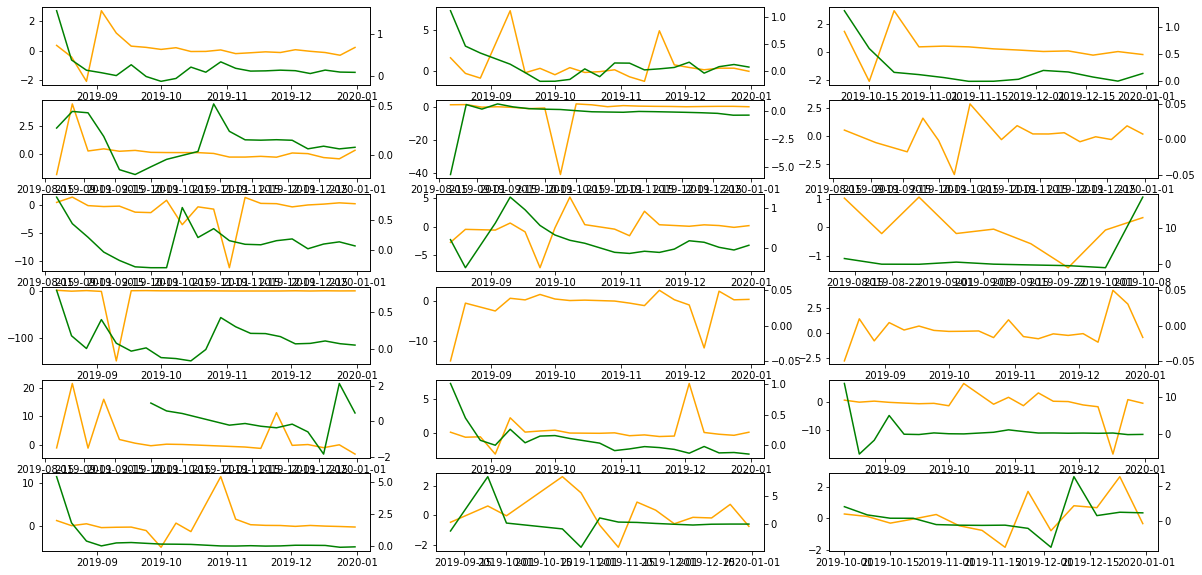

In [53]:
fig, ax = plt.subplots(figsize=(20,10), nrows=6, ncols=3)
axes=ax.flatten()
count=0
for s in df['station'].unique():
    station = df[df['station']==s]
    station = station[['ESI', '2inANOM', '4inANOM', '8inANOM',
       '20inANOM', '40inANOM', '2in_pr', '4in_pr', '8in_pr', '20in_pr',
       '40in_pr', '2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC', 'Category',]]
    station['ESI']=station['ESI'].cumsum().pct_change()
    axes[count].plot(station['ESI'], label='ESI pct change', color='orange')
    axes2 = axes[count].twinx()
    axes2.plot(station['4inANOM'].cumsum().pct_change(), label='4inANOM',color='green')
    count+=1

In [54]:
df['ESI']=df['ESI'].pct_change()

In [55]:
df

,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,2in_pr,...,20in_pr,40in_pr,2inSMSDC,4inSMSDC,8inSMSDC,20inSMSDC,40inSMSDC,point,Category,Station Name
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-06,NaN,2057:AL:SCAN,32,32,-0.320020,0.553622,0.785686,0.961752,1.143419,37.279983,...,84.777228,89.271329,NaN,NaN,NaN,NaN,NaN,POINT (-86.55 34.78333),NaN,AAMU-JTG
2019-08-13,-0.638554,2057:AL:SCAN,33,33,-0.262023,0.853190,0.985721,0.998732,1.210929,39.198644,...,85.969847,91.212010,NaN,NaN,NaN,NaN,NaN,POINT (-86.55 34.78333),NaN,AAMU-JTG
2019-08-20,-2.585714,2057:AL:SCAN,34,34,-1.076246,0.525206,0.761227,1.012649,1.018275,14.649612,...,86.374887,85.316734,1.0,NaN,NaN,NaN,NaN,POINT (-86.55 34.78333),NaN,AAMU-JTG
2019-08-27,1.837838,2057:AL:SCAN,35,35,-0.780767,0.251437,0.542510,0.906686,0.841734,22.750629,...,82.740774,78.908825,0.0,NaN,NaN,NaN,NaN,POINT (-86.55 34.78333),NaN,AAMU-JTG
2019-09-03,0.391534,2057:AL:SCAN,36,36,-0.866953,0.155705,0.471759,0.566161,0.510153,20.454794,...,69.903240,65.897718,NaN,NaN,NaN,NaN,NaN,POINT (-86.55 34.78333),NaN,AAMU-JTG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-03,-2.245136,2053:AL:SCAN,49,49,1.150144,1.130342,1.101391,0.734631,1.250638,89.625014,...,76.462646,92.029782,NaN,NaN,NaN,NaN,NaN,POINT (-86.53333 34.9),NaN,Wtars
2019-12-10,-1.218750,2053:AL:SCAN,50,50,1.031959,0.992935,1.385743,0.975073,1.056672,85.995408,...,85.182268,86.451849,NaN,NaN,NaN,NaN,NaN,POINT (-86.53333 34.9),NaN,Wtars
2019-12-17,0.521429,2053:AL:SCAN,51,51,0.535768,0.429769,0.578262,0.550751,0.735964,66.950913,...,69.273177,74.551446,NaN,NaN,NaN,NaN,NaN,POINT (-86.53333 34.9),NaN,Wtars


In [56]:
drought_data

,point,Category,Station Name,station
Date,,,,
2000-01-04,POINT (-85.51818 33.33168),2.0,Wedowee,2175:AL:SCAN
2000-01-11,POINT (-85.51818 33.33168),2.0,Wedowee,2175:AL:SCAN
2000-01-18,POINT (-85.51818 33.33168),2.0,Wedowee,2175:AL:SCAN
2000-01-25,POINT (-85.51818 33.33168),2.0,Wedowee,2175:AL:SCAN
2000-02-01,POINT (-85.51818 33.33168),1.0,Wedowee,2175:AL:SCAN
...,...,...,...,...
2020-12-01,POINT (-85.74802 32.43455),NaN,Tuskegee,2115:AL:SCAN
2020-12-08,POINT (-85.74802 32.43455),NaN,Tuskegee,2115:AL:SCAN
2020-12-15,POINT (-85.74802 32.43455),NaN,Tuskegee,2115:AL:SCAN


In [57]:
df = SM_VS_ESI_ANOM_READ.merge(drought_data, on=['station','Date'])

df

In [58]:
import seaborn as sns

In [59]:
df

,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,2in_pr,...,20in_pr,40in_pr,2inSMSDC,4inSMSDC,8inSMSDC,20inSMSDC,40inSMSDC,point,Category,Station Name
Date,,,,,,,,,,,,,,,,,,,,,
2002-04-30,-0.527,2057:AL:SCAN,18,18,-1.839516,-2.608769,-2.434962,-2.084585,-1.598313,2.459823,...,1.901440,4.357378,4.0,4.0,4.0,4.0,3.0,POINT (-86.55 34.78333),0.0,AAMU-JTG
2002-05-21,1.565,2057:AL:SCAN,21,21,-0.349508,-1.356723,-1.702116,-1.692849,-0.663807,36.405379,...,4.466697,26.913219,NaN,2.0,3.0,3.0,0.0,POINT (-86.55 34.78333),NaN,AAMU-JTG
2002-05-28,1.484,2057:AL:SCAN,22,22,-0.234778,-0.972001,-1.546049,-1.441618,-0.890192,40.024052,...,7.684518,18.943000,NaN,1.0,NaN,2.0,1.0,POINT (-86.55 34.78333),NaN,AAMU-JTG
2002-06-11,0.419,2057:AL:SCAN,24,24,-1.524178,-1.680948,-1.660611,-1.608081,-0.872815,5.914507,...,5.569307,19.602099,NaN,3.0,3.0,NaN,1.0,POINT (-86.55 34.78333),NaN,AAMU-JTG
2002-06-18,1.374,2057:AL:SCAN,25,25,-0.737961,-1.484239,-2.253738,-2.101628,-0.901292,23.854816,...,1.822682,18.674478,0.0,2.0,4.0,4.0,1.0,POINT (-86.55 34.78333),NaN,AAMU-JTG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-03,-0.640,2053:AL:SCAN,49,49,1.150144,1.130342,1.101391,0.734631,1.250638,89.625014,...,76.462646,92.029782,NaN,NaN,NaN,NaN,NaN,POINT (-86.53333 34.9),NaN,Wtars
2019-12-10,0.140,2053:AL:SCAN,50,50,1.031959,0.992935,1.385743,0.975073,1.056672,85.995408,...,85.182268,86.451849,NaN,NaN,NaN,NaN,NaN,POINT (-86.53333 34.9),NaN,Wtars
2019-12-17,0.213,2053:AL:SCAN,51,51,0.535768,0.429769,0.578262,0.550751,0.735964,66.950913,...,69.273177,74.551446,NaN,NaN,NaN,NaN,NaN,POINT (-86.53333 34.9),NaN,Wtars


In [60]:
drought_data[(drought_data['station']=='2057:AL:SCAN')&(drought_data.index.year>=2004)&(drought_data.index.month>=4)]

,point,Category,Station Name,station
Date,,,,
2004-04-06,POINT (-86.55 34.78333),NaN,AAMU-JTG,2057:AL:SCAN
2004-04-13,POINT (-86.55 34.78333),NaN,AAMU-JTG,2057:AL:SCAN
2004-04-20,POINT (-86.55 34.78333),NaN,AAMU-JTG,2057:AL:SCAN
2004-04-27,POINT (-86.55 34.78333),NaN,AAMU-JTG,2057:AL:SCAN
2004-05-04,POINT (-86.55 34.78333),NaN,AAMU-JTG,2057:AL:SCAN
...,...,...,...,...
2020-12-01,POINT (-86.55 34.78333),NaN,AAMU-JTG,2057:AL:SCAN
2020-12-08,POINT (-86.55 34.78333),NaN,AAMU-JTG,2057:AL:SCAN
2020-12-15,POINT (-86.55 34.78333),NaN,AAMU-JTG,2057:AL:SCAN


In [61]:
SM_VS_ESI_ANOM_READ[(SM_VS_ESI_ANOM_READ['station']=='2057:AL:SCAN')&(SM_VS_ESI_ANOM_READ.index.year==2004)]

,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,2in_pr,4in_pr,8in_pr,20in_pr,40in_pr,2inSMSDC,4inSMSDC,8inSMSDC,20inSMSDC,40inSMSDC
Date,,,,,,,,,,,,,,,,,,,
2004-01-01,-0.191,2057:AL:SCAN,1,1,0.307374,-0.827580,-0.540777,-0.784039,0.020601,58.357932,20.874230,28.778651,21.174617,49.090687,NaN,NaN,0.0,0.0,NaN
2004-01-08,1.332,2057:AL:SCAN,2,2,-0.283798,-1.078127,-1.020622,-1.579950,-0.122693,38.493495,14.094955,15.480013,5.895590,44.354937,NaN,1.0,1.0,NaN,NaN
2004-01-15,0.574,2057:AL:SCAN,3,3,-0.102735,-1.174363,-1.009023,-1.602453,-0.125039,44.615721,11.823785,15.723619,5.614311,44.269498,NaN,1.0,1.0,NaN,NaN
2004-01-22,-0.361,2057:AL:SCAN,4,4,-0.141601,-1.201839,-0.997620,-1.586285,-0.131288,43.325681,11.024880,15.967224,5.805581,44.086415,NaN,1.0,1.0,NaN,NaN
2004-01-29,-0.336,2057:AL:SCAN,5,5,0.056995,-1.153986,-0.946312,-1.491420,0.220913,49.666557,12.371605,17.262762,6.885689,55.645063,NaN,1.0,1.0,2.0,NaN
2004-02-05,-0.378,2057:AL:SCAN,6,6,-0.264735,-1.852535,-1.287358,-1.800230,-0.259310,39.116650,2.796165,9.611339,3.454095,39.960942,NaN,4.0,2.0,3.0,NaN
2004-02-12,0.622,2057:AL:SCAN,7,7,0.129697,-0.856487,-0.807563,-1.255875,0.493702,52.366896,20.223693,20.938988,10.328533,65.397290,NaN,NaN,NaN,NaN,NaN
2004-02-26,-0.108,2057:AL:SCAN,9,9,-0.424931,-1.762096,-0.939458,1.248398,-0.481203,33.879961,3.435289,17.462075,92.563006,32.588795,NaN,3.0,1.0,NaN,NaN
2004-03-04,0.320,2057:AL:SCAN,10,10,0.322596,-0.937536,0.218877,1.293428,-0.067247,58.915491,17.815567,56.372495,93.418092,46.234591,NaN,1.0,NaN,NaN,NaN


In [62]:
df.index.year.unique()

Int64Index([2002, 2008, 2013, 2019], dtype='int64', name='Date')

In [63]:
for s in SM_VS_ESI_ANOM_READ['station'].unique():
    #grab the station data for the ESI frame
    station_esi=SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']==s]
    
    #grab the station data for the drought frame
    station_dm = drought_data[drought_data['station']==s]
    for y in station_esi.index.year.unique():
        #get the year frame for the ESI station frame 
        ESIyearFrame = station[station.index.year==y]
        
        #get the year frame for the drought monitor station frame
        DMyearFrame = station_dm[station_dm.index.year==y]
        
        #get the monthFrame for the ESI
        for m in ESIyearFrame.index.month.unique():
            ESImonthFrame=ESIyearFrame[ESIyearFrame.index.month==m]
            DMmonthFrame=DMyearFrame[DMyearFrame.index.month==m]
            
            #print out each day
            print(ESImonthFrame, DMmonthFrame)

            ESI   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM     2in_pr  \
Date                                                                           
2019-09-24  NaN -0.159274 -1.152774 -0.180746  1.095121 -0.882577  42.647863   

              4in_pr     8in_pr    20in_pr    40in_pr  2inSMSDC  4inSMSDC  \
Date                                                                        
2019-09-24  12.39443  40.504927  88.760126  19.235933       NaN       1.0   

            8inSMSDC  20inSMSDC  40inSMSDC  Category  
Date                                                  
2019-09-24       NaN        NaN        1.0       1.0                                 point  Category Station Name       station
Date                                                                    
2019-09-03  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
2019-09-10  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
2019-09-17  POINT (-86.55 34.78333)       0.0     AAMU-JTG  2057:AL:SC

            ESI   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM     2in_pr  \
Date                                                                           
2019-09-24  NaN -0.159274 -1.152774 -0.180746  1.095121 -0.882577  42.647863   

              4in_pr     8in_pr    20in_pr    40in_pr  2inSMSDC  4inSMSDC  \
Date                                                                        
2019-09-24  12.39443  40.504927  88.760126  19.235933       NaN       1.0   

            8inSMSDC  20inSMSDC  40inSMSDC  Category  
Date                                                  
2019-09-24       NaN        NaN        1.0       1.0                                    point  Category   Station Name       station
Date                                                                         
2019-09-03  POINT (-86.79897 34.19492)       NaN  Cullman-NAHRC  2113:AL:SCAN
2019-09-10  POINT (-86.79897 34.19492)       NaN  Cullman-NAHRC  2113:AL:SCAN
2019-09-17  POINT (-86.79897 34.19492)       NaN  

            ESI   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM     2in_pr  \
Date                                                                           
2019-09-24  NaN -0.159274 -1.152774 -0.180746  1.095121 -0.882577  42.647863   

              4in_pr     8in_pr    20in_pr    40in_pr  2inSMSDC  4inSMSDC  \
Date                                                                        
2019-09-24  12.39443  40.504927  88.760126  19.235933       NaN       1.0   

            8inSMSDC  20inSMSDC  40inSMSDC  Category  
Date                                                  
2019-09-24       NaN        NaN        1.0       1.0                                    point  Category  Station Name       station
Date                                                                        
2019-09-03  POINT (-87.98685 34.81982)       NaN  Isbell Farms  2173:AL:SCAN
2019-09-10  POINT (-87.98685 34.81982)       NaN  Isbell Farms  2173:AL:SCAN
2019-09-17  POINT (-87.98685 34.81982)       NaN  Isbe

            ESI   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM     2in_pr  \
Date                                                                           
2019-09-24  NaN -0.159274 -1.152774 -0.180746  1.095121 -0.882577  42.647863   

              4in_pr     8in_pr    20in_pr    40in_pr  2inSMSDC  4inSMSDC  \
Date                                                                        
2019-09-24  12.39443  40.504927  88.760126  19.235933       NaN       1.0   

            8inSMSDC  20inSMSDC  40inSMSDC  Category  
Date                                                  
2019-09-24       NaN        NaN        1.0       1.0                                    point  Category  Station Name       station
Date                                                                        
2019-09-03  POINT (-85.91028 32.41222)       0.0  Morris Farms  2178:AL:SCAN
2019-09-10  POINT (-85.91028 32.41222)       0.0  Morris Farms  2178:AL:SCAN
2019-09-17  POINT (-85.91028 32.41222)       1.0  Morr

2019-11-26       NaN       NaN        NaN        NaN       NaN                                    point  Category      Station Name  \
Date                                                                 
2019-11-05  POINT (-85.03693 31.01912)       1.0  River Road Farms   
2019-11-12  POINT (-85.03693 31.01912)       0.0  River Road Farms   
2019-11-19  POINT (-85.03693 31.01912)       0.0  River Road Farms   
2019-11-26  POINT (-85.03693 31.01912)       0.0  River Road Farms   

                 station  
Date                      
2019-11-05  2182:AL:SCAN  
2019-11-12  2182:AL:SCAN  
2019-11-19  2182:AL:SCAN  
2019-11-26  2182:AL:SCAN  
                 ESI   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM  \
Date                                                                     
2019-12-03 -0.784314  1.150144  1.130342  1.101391  0.734631  1.250638   
2019-12-10  0.795455  1.031959  0.992935  1.385743  0.975073  1.056672   
2019-12-17  0.674051  0.535768  0.429769  0.578262  0.55

2019-12-31       NaN       NaN        NaN        NaN       NaN                                    point  Category   Station Name       station
Date                                                                         
2019-12-03  POINT (-87.45618 34.17973)       NaN  Sudduth Farms  2179:AL:SCAN
2019-12-10  POINT (-87.45618 34.17973)       NaN  Sudduth Farms  2179:AL:SCAN
2019-12-17  POINT (-87.45618 34.17973)       NaN  Sudduth Farms  2179:AL:SCAN
2019-12-24  POINT (-87.45618 34.17973)       NaN  Sudduth Farms  2179:AL:SCAN
2019-12-31  POINT (-87.45618 34.17973)       NaN  Sudduth Farms  2179:AL:SCAN
            ESI   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM     2in_pr  \
Date                                                                           
2019-09-24  NaN -0.159274 -1.152774 -0.180746  1.095121 -0.882577  42.647863   

              4in_pr     8in_pr    20in_pr    40in_pr  2inSMSDC  4inSMSDC  \
Date                                                                   

In [64]:
drought_data

,point,Category,Station Name,station
Date,,,,
2000-01-04,POINT (-85.51818 33.33168),2.0,Wedowee,2175:AL:SCAN
2000-01-11,POINT (-85.51818 33.33168),2.0,Wedowee,2175:AL:SCAN
2000-01-18,POINT (-85.51818 33.33168),2.0,Wedowee,2175:AL:SCAN
2000-01-25,POINT (-85.51818 33.33168),2.0,Wedowee,2175:AL:SCAN
2000-02-01,POINT (-85.51818 33.33168),1.0,Wedowee,2175:AL:SCAN
...,...,...,...,...
2020-12-01,POINT (-85.74802 32.43455),NaN,Tuskegee,2115:AL:SCAN
2020-12-08,POINT (-85.74802 32.43455),NaN,Tuskegee,2115:AL:SCAN
2020-12-15,POINT (-85.74802 32.43455),NaN,Tuskegee,2115:AL:SCAN


In [65]:
drought_data=drought_data.sort_index()
SM_VS_ESI_ANOM_READ.sort_index()

,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,2in_pr,4in_pr,8in_pr,20in_pr,40in_pr,2inSMSDC,4inSMSDC,8inSMSDC,20inSMSDC,40inSMSDC
Date,,,,,,,,,,,,,,,,,,,
2002-02-12,-1.326,2053:AL:SCAN,7,7,0.834835,-0.643664,0.542349,-0.382594,-1.350406,78.965781,26.774709,69.073192,33.190819,7.896985,NaN,0.0,NaN,NaN,2.0
2002-02-19,-1.577,2053:AL:SCAN,8,8,0.164259,-1.027176,0.290153,-0.570702,-0.278074,53.503881,15.373202,59.273613,27.351485,39.423898,NaN,1.0,NaN,0.0,NaN
2002-02-26,-1.735,2053:AL:SCAN,9,9,0.106221,-1.050136,0.179310,-0.718167,-1.268593,51.350169,14.802556,54.722622,23.278578,9.325034,NaN,1.0,NaN,0.0,2.0
2002-03-05,-0.752,2053:AL:SCAN,10,10,-0.309406,-1.455401,0.104532,-1.160224,-1.585050,37.640757,6.893403,51.699701,12.207471,4.638106,NaN,2.0,NaN,1.0,3.0
2002-03-12,-2.121,2053:AL:SCAN,11,11,-0.113839,-1.455137,0.076642,-1.003007,-1.445378,44.233082,6.904816,50.603477,15.706571,6.505554,NaN,2.0,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,0.047,2115:AL:SCAN,53,53,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,24.920739,24.743209,23.856716,23.829883,25.503479,0.0,0.0,0.0,0.0,0.0
2020-12-30,0.266,2177:AL:SCAN,53,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-30,0.208,2175:AL:SCAN,53,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
drought_data.reset_index(inplace=True)
SM_VS_ESI_ANOM_READ.reset_index(inplace=True)

In [67]:
combined = pd.merge_asof(SM_VS_ESI_ANOM_READ.sort_values('Date'), drought_data.sort_values('Date'), on='Date', by='station', tolerance=pd.Timedelta(7, unit="d"), allow_exact_matches=True)

In [68]:
combined[~combined['point'].isnull()]

,Date,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,...,20in_pr,40in_pr,2inSMSDC,4inSMSDC,8inSMSDC,20inSMSDC,40inSMSDC,point,Category,Station Name
0,2002-02-12,-1.326,2053:AL:SCAN,7,7,0.834835,-0.643664,0.542349,-0.382594,-1.350406,...,33.190819,7.896985,NaN,0.0,NaN,NaN,2.0,POINT (-86.53333 34.9),NaN,Wtars
1,2002-02-19,-1.577,2053:AL:SCAN,8,8,0.164259,-1.027176,0.290153,-0.570702,-0.278074,...,27.351485,39.423898,NaN,1.0,NaN,0.0,NaN,POINT (-86.53333 34.9),NaN,Wtars
2,2002-02-26,-1.735,2053:AL:SCAN,9,9,0.106221,-1.050136,0.179310,-0.718167,-1.268593,...,23.278578,9.325034,NaN,1.0,NaN,0.0,2.0,POINT (-86.53333 34.9),NaN,Wtars
3,2002-03-05,-0.752,2053:AL:SCAN,10,10,-0.309406,-1.455401,0.104532,-1.160224,-1.585050,...,12.207471,4.638106,NaN,2.0,NaN,1.0,3.0,POINT (-86.53333 34.9),NaN,Wtars
4,2002-03-12,-2.121,2053:AL:SCAN,11,11,-0.113839,-1.455137,0.076642,-1.003007,-1.445378,...,15.706571,6.505554,NaN,2.0,NaN,1.0,2.0,POINT (-86.53333 34.9),0.0,Wtars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9669,2020-12-30,0.047,2115:AL:SCAN,53,53,-0.707107,-0.707107,-0.707107,-0.707107,-0.707107,...,23.829883,25.503479,0.0,0.0,0.0,0.0,0.0,POINT (-85.74802 32.43455),NaN,Tuskegee
9670,2020-12-30,0.266,2177:AL:SCAN,53,53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-86.05253 32.28393),NaN,Broad Acres
9671,2020-12-30,0.208,2175:AL:SCAN,53,53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-85.51818 33.33168),NaN,Wedowee
9672,2020-12-30,-1.000,2173:AL:SCAN,53,53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-87.98685 34.81982),NaN,Isbell Farms


In [69]:
combined.set_index('Date', inplace=True)
combined.sort_index(inplace=True)

In [70]:
stations = {}
for y in combined.index.year.unique():
    #get the unique year
    yearFrame = combined[combined.index.year==y]
    
    for s in yearFrame.station.unique():
        #in that year, get each station and create new data
        station = yearFrame[yearFrame['station']==s]
        station['ESI_cumsum']=station['ESI'].cumsum()
        station['ESI_pc']=station['ESI'].pct_change()*100.0
        station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
        station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
        station['4inpc']=station['4in_pr'].diff()/station['4in_pr'].abs().shift()*100.0
        station.reset_index(inplace=True)
        stations[s+str(y)]=station

/var/folders/y9/hh5gbzrj2yb99_tywtn0r8s80000gn/T/ipykernel_20482/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum']=station['ESI'].cumsum()
/var/folders/y9/hh5gbzrj2yb99_tywtn0r8s80000gn/T/ipykernel_20482/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/var/folders/y9/hh5gbzrj2yb99_tywtn0r8s80000gn/T/ipykernel_20482/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [71]:
df = pd.concat(stations, axis=0)

In [72]:
df.set_index('Date', inplace=True)

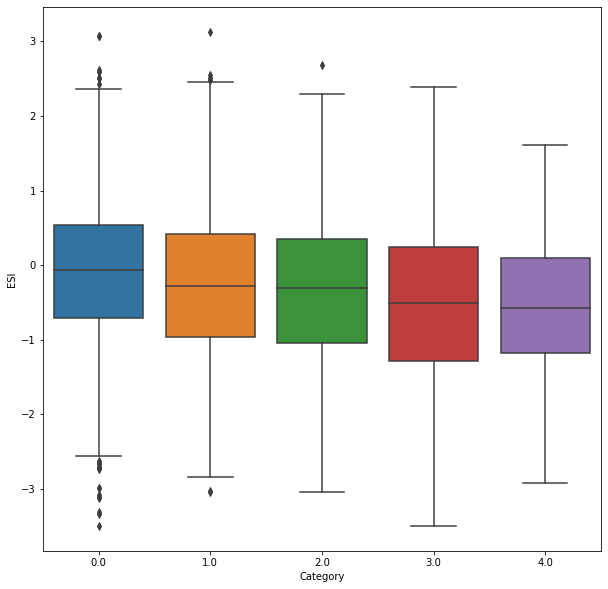

In [73]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=df, x='Category', y='ESI')

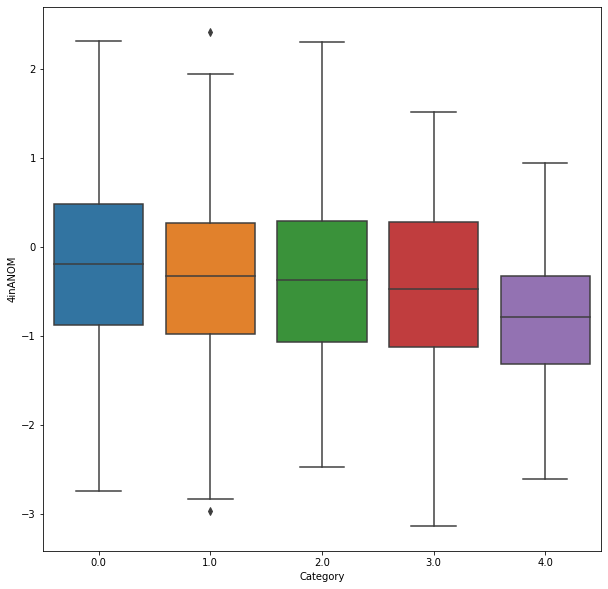

In [74]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=df, x='Category', y='4inANOM')

In [75]:
#now for 8-11 months
good_months = df[(df.index.get_level_values('Date').month>=9)&(df.index.get_level_values('Date').month<=11)]

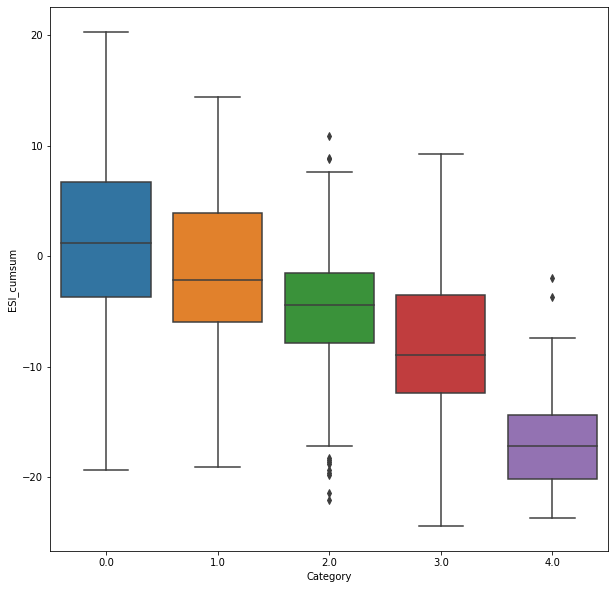

In [76]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=good_months, x='Category', y='ESI_cumsum')

In [77]:
df['ESI_bin'] = pd.qcut(df['ESI'],30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '(-3.501, -1.924]'),
  Text(1, 0, '(-1.924, -1.569]'),
  Text(2, 0, '(-1.569, -1.318]'),
  Text(3, 0, '(-1.318, -1.127]'),
  Text(4, 0, '(-1.127, -0.961]'),
  Text(5, 0, '(-0.961, -0.812]'),
  Text(6, 0, '(-0.812, -0.688]'),
  Text(7, 0, '(-0.688, -0.584]'),
  Text(8, 0, '(-0.584, -0.485]'),
  Text(9, 0, '(-0.485, -0.38]'),
  Text(10, 0, '(-0.38, -0.295]'),
  Text(11, 0, '(-0.295, -0.206]'),
  Text(12, 0, '(-0.206, -0.115]'),
  Text(13, 0, '(-0.115, -0.033]'),
  Text(14, 0, '(-0.033, 0.0555]'),
  Text(15, 0, '(0.0555, 0.133]'),
  Text(16, 0, '(0.133, 0.218]'),
  Text(17, 0, '(0.218, 0.301]'),
  Text(18, 0, '(0.301, 0.386]'),
  Text(19, 0, '(0.386, 0.472]'),
  Text(20, 0, '(0.472, 0.552]'),
  Text(21, 0, '(0.552, 0.656]'),
  Text(22, 0, '(0.656, 0.76]'),
  Text(23, 0, '(0.76, 0.87]'),
  Text(24, 0, '(0.87, 1.003]'),
  Text(25, 0, '(1.003,

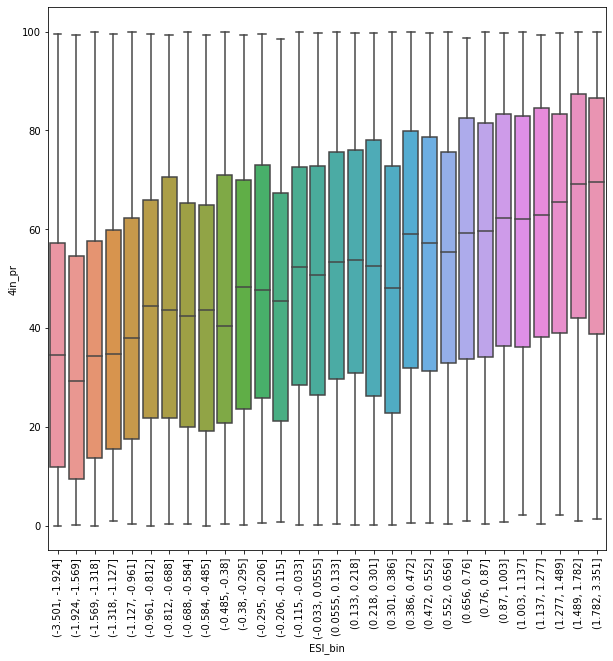

In [78]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=df, x='ESI_bin', y='4in_pr', ax=ax)
plt.xticks(rotation=90)

In [79]:
good_months = df[(df.index.get_level_values('Date').month>=9)&(df.index.get_level_values('Date').month<=11)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '(-3.501, -1.924]'),
  Text(1, 0, '(-1.924, -1.569]'),
  Text(2, 0, '(-1.569, -1.318]'),
  Text(3, 0, '(-1.318, -1.127]'),
  Text(4, 0, '(-1.127, -0.961]'),
  Text(5, 0, '(-0.961, -0.812]'),
  Text(6, 0, '(-0.812, -0.688]'),
  Text(7, 0, '(-0.688, -0.584]'),
  Text(8, 0, '(-0.584, -0.485]'),
  Text(9, 0, '(-0.485, -0.38]'),
  Text(10, 0, '(-0.38, -0.295]'),
  Text(11, 0, '(-0.295, -0.206]'),
  Text(12, 0, '(-0.206, -0.115]'),
  Text(13, 0, '(-0.115, -0.033]'),
  Text(14, 0, '(-0.033, 0.0555]'),
  Text(15, 0, '(0.0555, 0.133]'),
  Text(16, 0, '(0.133, 0.218]'),
  Text(17, 0, '(0.218, 0.301]'),
  Text(18, 0, '(0.301, 0.386]'),
  Text(19, 0, '(0.386, 0.472]'),
  Text(20, 0, '(0.472, 0.552]'),
  Text(21, 0, '(0.552, 0.656]'),
  Text(22, 0, '(0.656, 0.76]'),
  Text(23, 0, '(0.76, 0.87]'),
  Text(24, 0, '(0.87, 1.003]'),
  Text(25, 0, '(1.003,

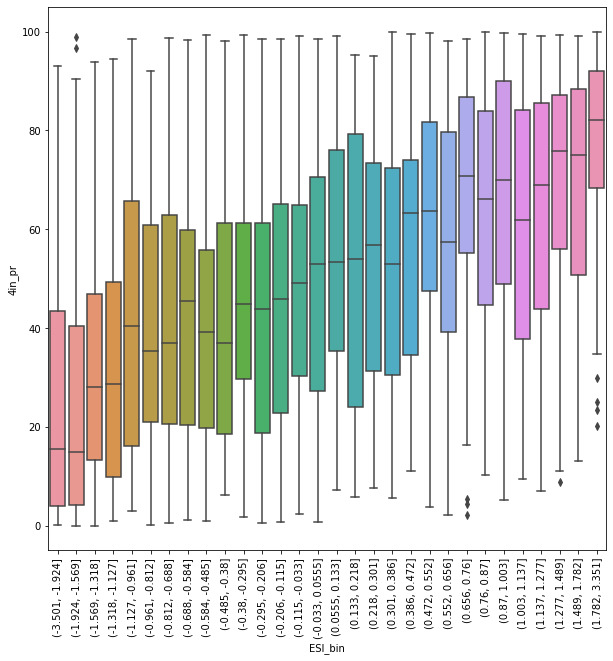

In [80]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=good_months, x='ESI_bin', y='4in_pr', ax=ax)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='ESI_cumsum', ylabel='4in_pr'>

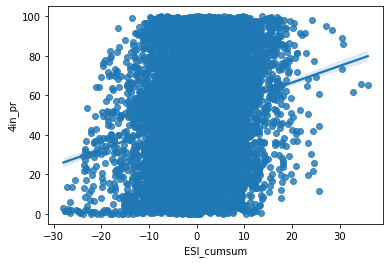

In [81]:
sns.regplot(x='ESI_cumsum', y='4in_pr', data=df)

In [82]:
df['ESI_cumsum_bin'] = pd.qcut(df['ESI_cumsum'],30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '(-3.501, -1.924]'),
  Text(1, 0, '(-1.924, -1.569]'),
  Text(2, 0, '(-1.569, -1.318]'),
  Text(3, 0, '(-1.318, -1.127]'),
  Text(4, 0, '(-1.127, -0.961]'),
  Text(5, 0, '(-0.961, -0.812]'),
  Text(6, 0, '(-0.812, -0.688]'),
  Text(7, 0, '(-0.688, -0.584]'),
  Text(8, 0, '(-0.584, -0.485]'),
  Text(9, 0, '(-0.485, -0.38]'),
  Text(10, 0, '(-0.38, -0.295]'),
  Text(11, 0, '(-0.295, -0.206]'),
  Text(12, 0, '(-0.206, -0.115]'),
  Text(13, 0, '(-0.115, -0.033]'),
  Text(14, 0, '(-0.033, 0.0555]'),
  Text(15, 0, '(0.0555, 0.133]'),
  Text(16, 0, '(0.133, 0.218]'),
  Text(17, 0, '(0.218, 0.301]'),
  Text(18, 0, '(0.301, 0.386]'),
  Text(19, 0, '(0.386, 0.472]'),
  Text(20, 0, '(0.472, 0.552]'),
  Text(21, 0, '(0.552, 0.656]'),
  Text(22, 0, '(0.656, 0.76]'),
  Text(23, 0, '(0.76, 0.87]'),
  Text(24, 0, '(0.87, 1.003]'),
  Text(25, 0, '(1.003,

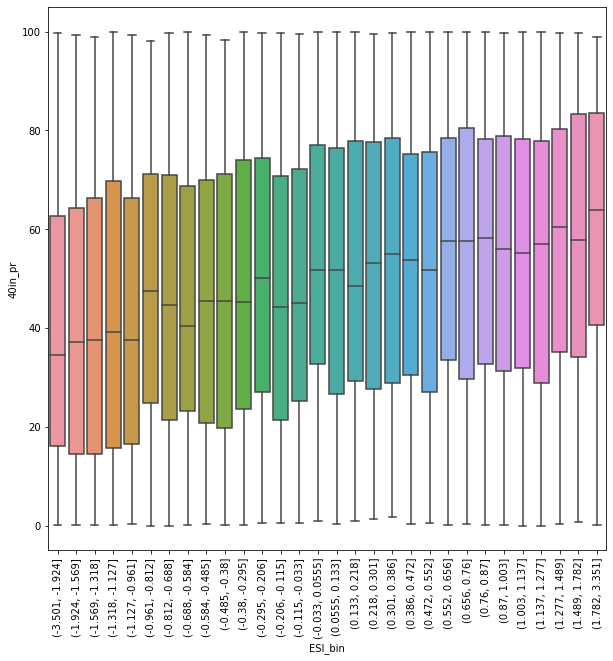

In [83]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=df, x='ESI_bin', y='40in_pr', ax=ax)
plt.xticks(rotation=90)

In [84]:
good_months = df[(df.index.month>=9)&(df.index.month<=11)]
good_months['ESI_bin'] = pd.qcut(good_months['ESI'],30)

/var/folders/y9/hh5gbzrj2yb99_tywtn0r8s80000gn/T/ipykernel_20482/3425253894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_months['ESI_bin'] = pd.qcut(good_months['ESI'],30)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '(-3.477, -1.995]'),
  Text(1, 0, '(-1.995, -1.647]'),
  Text(2, 0, '(-1.647, -1.39]'),
  Text(3, 0, '(-1.39, -1.21]'),
  Text(4, 0, '(-1.21, -1.055]'),
  Text(5, 0, '(-1.055, -0.891]'),
  Text(6, 0, '(-0.891, -0.736]'),
  Text(7, 0, '(-0.736, -0.618]'),
  Text(8, 0, '(-0.618, -0.5]'),
  Text(9, 0, '(-0.5, -0.391]'),
  Text(10, 0, '(-0.391, -0.299]'),
  Text(11, 0, '(-0.299, -0.216]'),
  Text(12, 0, '(-0.216, -0.146]'),
  Text(13, 0, '(-0.146, -0.048]'),
  Text(14, 0, '(-0.048, 0.042]'),
  Text(15, 0, '(0.042, 0.129]'),
  Text(16, 0, '(0.129, 0.209]'),
  Text(17, 0, '(0.209, 0.296]'),
  Text(18, 0, '(0.296, 0.382]'),
  Text(19, 0, '(0.382, 0.468]'),
  Text(20, 0, '(0.468, 0.543]'),
  Text(21, 0, '(0.543, 0.636]'),
  Text(22, 0, '(0.636, 0.743]'),
  Text(23, 0, '(0.743, 0.839]'),
  Text(24, 0, '(0.839, 0.954]'),
  Text(25, 0, '(0.954, 1.1

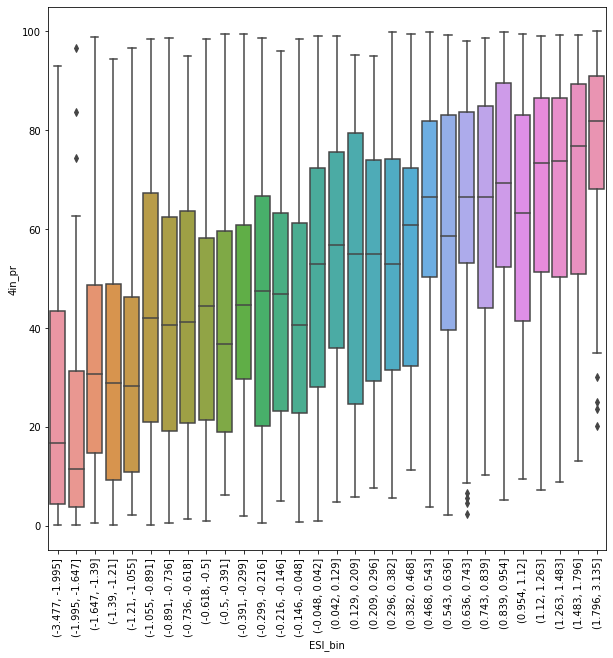

In [85]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=good_months, x='ESI_bin', y='4in_pr', ax=ax)
plt.xticks(rotation=90)

In [86]:
summer_months=df[(df.index.month>=6)&(df.index.month<=9)]
summer_months['ESI_bin'] = pd.qcut(summer_months['ESI'],30)

/var/folders/y9/hh5gbzrj2yb99_tywtn0r8s80000gn/T/ipykernel_20482/1020472137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_months['ESI_bin'] = pd.qcut(summer_months['ESI'],30)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '(-3.501, -1.961]'),
  Text(1, 0, '(-1.961, -1.602]'),
  Text(2, 0, '(-1.602, -1.343]'),
  Text(3, 0, '(-1.343, -1.177]'),
  Text(4, 0, '(-1.177, -0.988]'),
  Text(5, 0, '(-0.988, -0.82]'),
  Text(6, 0, '(-0.82, -0.702]'),
  Text(7, 0, '(-0.702, -0.578]'),
  Text(8, 0, '(-0.578, -0.468]'),
  Text(9, 0, '(-0.468, -0.353]'),
  Text(10, 0, '(-0.353, -0.269]'),
  Text(11, 0, '(-0.269, -0.165]'),
  Text(12, 0, '(-0.165, -0.085]'),
  Text(13, 0, '(-0.085, 0.0078]'),
  Text(14, 0, '(0.0078, 0.088]'),
  Text(15, 0, '(0.088, 0.174]'),
  Text(16, 0, '(0.174, 0.278]'),
  Text(17, 0, '(0.278, 0.353]'),
  Text(18, 0, '(0.353, 0.437]'),
  Text(19, 0, '(0.437, 0.507]'),
  Text(20, 0, '(0.507, 0.607]'),
  Text(21, 0, '(0.607, 0.703]'),
  Text(22, 0, '(0.703, 0.793]'),
  Text(23, 0, '(0.793, 0.904]'),
  Text(24, 0, '(0.904, 1.01]'),
  Text(25, 0, '(1.01,

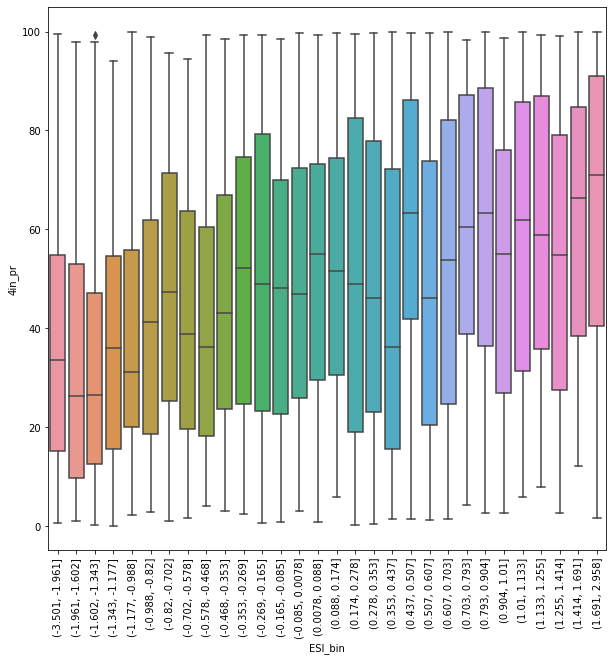

In [87]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=summer_months, x='ESI_bin', y='4in_pr', ax=ax)
plt.xticks(rotation=90)

In [88]:
sigs = {}
for s in df['station'].unique():
    #get the stationframe from the main dataset
    stationFrame=df[df['station']==s]
    
    #get the signigigance df at the same station
    sigdf = SCAN_SIG_READ[SCAN_SIG_READ['station']==s]
    
    for m in sigdf['Month'].unique():
        #get the stationFrame where sigFrame == m for station s
        monthStation = stationFrame[stationFrame.index.month==m]
        sigs[s+str(m)]=monthStation
        

In [89]:
newdf = pd.concat(sigs, axis=0)

In [90]:
newdf

ESI       station  week_x  week_y   2inANOM  \
              Date                                                        
2053:AL:SCAN4 2002-04-02 -0.435  2053:AL:SCAN      14      14  0.724556   
              2002-04-09 -0.163  2053:AL:SCAN      15      15  0.318988   
              2002-04-16 -0.484  2053:AL:SCAN      16      16  0.158151   
              2002-04-23 -1.498  2053:AL:SCAN      17      17 -0.756754   
              2002-04-30  0.554  2053:AL:SCAN      18      18 -0.873574   
...                         ...           ...     ...     ...       ...   
2181:AL:SCAN2 2019-02-26  0.198  2181:AL:SCAN       9       9  0.347273   
              2020-02-05  0.198  2181:AL:SCAN       6       6  1.809272   
              2020-02-12 -0.841  2181:AL:SCAN       7       7  1.302807   
              2020-02-19 -0.469  2181:AL:SCAN       8       8  1.087912   
              2020-02-26  1.661  2181:AL:SCAN       9       9  1.041819   

                           4inANOM   8inANOM  20inANOM  40inANOM     2in_pr  \
              Date                                                            
2053:AL:SCAN4 2002-04-02  0.095368  0.720884 -0.133735 -0.241910  74.723953   
              2002-04-09 -0.067437  0.484996 -0.619942  0.189875  58.740571   
              2002-04-16  0.072646  0.665487 -0.431747  0.349802  53.350825   
              2002-04-23 -0.837206  0.346158 -0.322725  0.079589  23.330054   
              2002-04-30 -1.832470  0.071150 -0.237434  0.021554  20.225210   
...                            ...       ...       ...       ...        ...   
2181:AL:SCAN2 2019-02-26       NaN  0.006028 -1.179529 -0.079067  59.954083   
              2020-02-05       NaN  1.576041  1.187023  1.614214  98.381983   
              2020-02-12       NaN  1.016485  1.558269  1.662730  93.025036   
              2020-02-19       NaN  1.355394  0.411302  0.946471  87.810211   
              2020-02-26       NaN  1.392552  0.183447  1.208351  86.432710   

                          ...                       point  Category  \
              Date        ...                                         
2053:AL:SCAN4 2002-04-02  ...      POINT (-86.53333 34.9)       NaN   
              2002-04-09  ...      POINT (-86.53333 34.9)       NaN   
              2002-04-16  ...      POINT (-86.53333 34.9)       NaN   
              2002-04-23  ...      POINT (-86.53333 34.9)       0.0   
              2002-04-30  ...      POINT (-86.53333 34.9)       0.0   
...                       ...                         ...       ...   
2181:AL:SCAN2 2019-02-26  ...  POINT (-87.55277 31.10923)       NaN   
              2020-02-05  ...  POINT (-87.55277 31.10923)       0.0   
              2020-02-12  ...  POINT (-87.55277 31.10923)       NaN   
              2020-02-19  ...  POINT (-87.55277 31.10923)       NaN   
              2020-02-26  ...  POINT (-87.55277 31.10923)       NaN   

                               Station Name  ESI_cumsum      ESI_pc  \
              Date                                                    
2053:AL:SCAN4 2002-04-02              Wtars      -6.540 -130.938834   
              2002-04-09              Wtars      -6.703  -62.528736   
              2002-04-16              Wtars      -7.187  196.932515   
              2002-04-23              Wtars      -8.685  209.504132   
              2002-04-30              Wtars      -8.131 -136.982644   
...                                     ...         ...         ...   
2181:AL:SCAN2 2019-02-26  Perdido Riv Farms       0.523 -110.448549   
              2020-02-05  Perdido Riv Farms      -0.712  -76.230492   
              2020-02-12  Perdido Riv Farms      -1.553 -524.747475   
              2020-02-19  Perdido Riv Farms      -2.022  -44.233056   
              2020-02-26  Perdido Riv Farms      -0.361 -454.157783   

                          ESI_cumsum_pc  4inANOM_cumsum      4inpc  \
              Date                                                   
2053:AL:SCAN4 2002-04-02       7.125

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '(-3.501, -1.924]'),
  Text(1, 0, '(-1.924, -1.569]'),
  Text(2, 0, '(-1.569, -1.318]'),
  Text(3, 0, '(-1.318, -1.127]'),
  Text(4, 0, '(-1.127, -0.961]'),
  Text(5, 0, '(-0.961, -0.812]'),
  Text(6, 0, '(-0.812, -0.688]'),
  Text(7, 0, '(-0.688, -0.584]'),
  Text(8, 0, '(-0.584, -0.485]'),
  Text(9, 0, '(-0.485, -0.38]'),
  Text(10, 0, '(-0.38, -0.295]'),
  Text(11, 0, '(-0.295, -0.206]'),
  Text(12, 0, '(-0.206, -0.115]'),
  Text(13, 0, '(-0.115, -0.033]'),
  Text(14, 0, '(-0.033, 0.0555]'),
  Text(15, 0, '(0.0555, 0.133]'),
  Text(16, 0, '(0.133, 0.218]'),
  Text(17, 0, '(0.218, 0.301]'),
  Text(18, 0, '(0.301, 0.386]'),
  Text(19, 0, '(0.386, 0.472]'),
  Text(20, 0, '(0.472, 0.552]'),
  Text(21, 0, '(0.552, 0.656]'),
  Text(22, 0, '(0.656, 0.76]'),
  Text(23, 0, '(0.76, 0.87]'),
  Text(24, 0, '(0.87, 1.003]'),
  Text(25, 0, '(1.003,

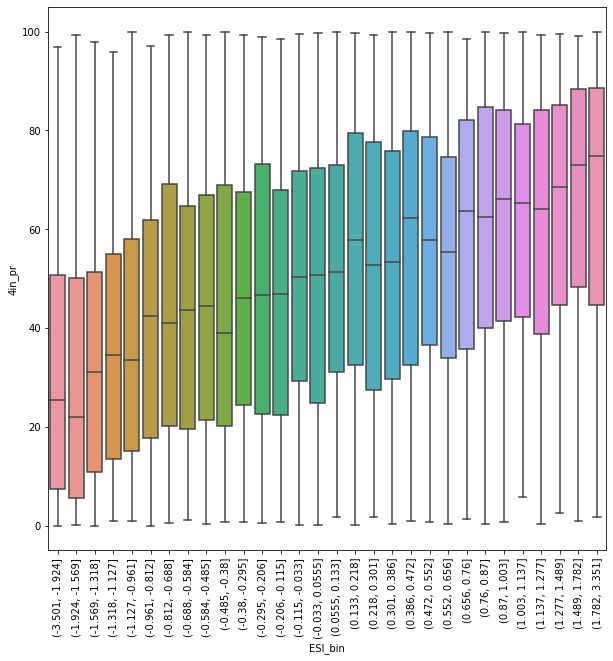

In [91]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=newdf,x='ESI_bin', y='4in_pr', ax=ax)
plt.xticks(rotation=90)

In [92]:
import scipy as sp

In [93]:
newdf.dropna(subset=['4in_pr'], inplace=True)

In [94]:
newdf

ESI       station  week_x  week_y   2inANOM  \
              Date                                                        
2053:AL:SCAN4 2002-04-02 -0.435  2053:AL:SCAN      14      14  0.724556   
              2002-04-09 -0.163  2053:AL:SCAN      15      15  0.318988   
              2002-04-16 -0.484  2053:AL:SCAN      16      16  0.158151   
              2002-04-23 -1.498  2053:AL:SCAN      17      17 -0.756754   
              2002-04-30  0.554  2053:AL:SCAN      18      18 -0.873574   
...                         ...           ...     ...     ...       ...   
2181:AL:SCAN2 2017-02-19 -1.245  2181:AL:SCAN       7       7 -1.391765   
              2017-02-26 -1.290  2181:AL:SCAN       8       8 -0.508383   
              2018-02-05 -0.247  2181:AL:SCAN       6       6 -0.398190   
              2018-02-12  1.660  2181:AL:SCAN       7       7  0.849407   
              2018-02-19  2.106  2181:AL:SCAN       8       8  0.049001   

                           4inANOM   8inANOM  20inANOM  40inANOM     2in_pr  \
              Date                                                            
2053:AL:SCAN4 2002-04-02  0.095368  0.720884 -0.133735 -0.241910  74.723953   
              2002-04-09 -0.067437  0.484996 -0.619942  0.189875  58.740571   
              2002-04-16  0.072646  0.665487 -0.431747  0.349802  53.350825   
              2002-04-23 -0.837206  0.346158 -0.322725  0.079589  23.330054   
              2002-04-30 -1.832470  0.071150 -0.237434  0.021554  20.225210   
...                            ...       ...       ...       ...        ...   
2181:AL:SCAN2 2017-02-19 -0.880697 -1.029576 -0.904181 -0.816375   7.794905   
              2017-02-26  0.620348 -1.312816  0.141193 -0.208365  31.365475   
              2018-02-05 -0.190989  0.416556       NaN       NaN  34.688969   
              2018-02-12  1.438034  0.679838       NaN       NaN  79.588936   
              2018-02-19  0.726985  0.219985       NaN       NaN  49.404176   

                          ...                       point  Category  \
              Date        ...                                         
2053:AL:SCAN4 2002-04-02  ...      POINT (-86.53333 34.9)       NaN   
              2002-04-09  ...      POINT (-86.53333 34.9)       NaN   
              2002-04-16  ...      POINT (-86.53333 34.9)       NaN   
              2002-04-23  ...      POINT (-86.53333 34.9)       0.0   
              2002-04-30  ...      POINT (-86.53333 34.9)       0.0   
...                       ...                         ...       ...   
2181:AL:SCAN2 2017-02-19  ...  POINT (-87.55277 31.10923)       NaN   
              2017-02-26  ...  POINT (-87.55277 31.10923)       NaN   
              2018-02-05  ...  POINT (-87.55277 31.10923)       2.0   
              2018-02-12  ...  POINT (-87.55277 31.10923)       2.0   
              2018-02-19  ...  POINT (-87.55277 31.10923)       1.0   

                               Station Name  ESI_cumsum      ESI_pc  \
              Date                                                    
2053:AL:SCAN4 2002-04-02              Wtars      -6.540 -130.938834   
              2002-04-09              Wtars      -6.703  -62.528736   
              2002-04-16              Wtars      -7.187  196.932515   
              2002-04-23              Wtars      -8.685  209.504132   
              2002-04-30              Wtars      -8.131 -136.982644   
...                                     ...         ...         ...   
2181:AL:SCAN2 2017-02-19  Perdido Riv Farms      -5.776  -17.275748   
              2017-02-26  Perdido Riv Farms      -7.066    3.614458   
              2018-02-05  Perdido Riv Farms       3.484  -52.408478   
              2018-02-12  Perdido Riv Farms       5.144 -772.064777   
              2018-02-19  Perdido Riv Farms       7.250   26.867470   

                          ESI_cumsum_pc  4inANOM_cumsum       4inpc  \
              Date                                                    
2053:AL:SCAN4 2002-04-02       7.1

In [95]:
def annotate(**kws):
    r, p = sp.stats.pearsonr(newdf['ESI'], newdf['4in_pr'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

Text(0.5, 1.0, 'ESI vs 4in_pr')

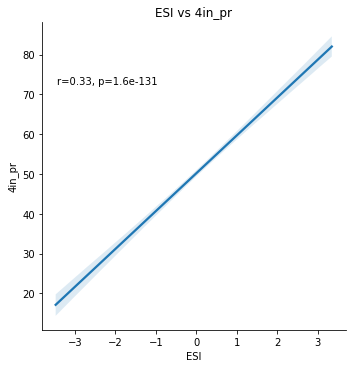

In [96]:
g = sns.lmplot(x='ESI', y='4in_pr', data=newdf, scatter=False)
g.map_dataframe(annotate)
ax = plt.gca()
ax.set_title('ESI vs 4in_pr')

In [97]:
soils = SOILS_READ[SOILS_READ['depth']=='HSMS-4.0in'].transpose()

In [98]:
soils.reset_index(inplace=True)

In [99]:
soils=soils.drop(0)

In [100]:
soils

,index,6
1,2057:AL:SCAN,D
2,2078:AL:SCAN,B
3,2177:AL:SCAN,D
4,2113:AL:SCAN,A
5,2174:AL:SCAN,D
6,2055:AL:SCAN,B
7,2173:AL:SCAN,B
8,2180:AL:SCAN,A
9,2114:AL:SCAN,D
10,2178:AL:SCAN,A


In [101]:
soils=soils.rename(columns={'index':'station', 6:'4insoils'})

In [102]:
newdf.reset_index(inplace=True)

In [103]:
final = newdf.merge(soils, on=['station'])

In [104]:
final['ESI_bin'] = pd.qcut(final['ESI'], 12, labels=np.arange(0,12,1))

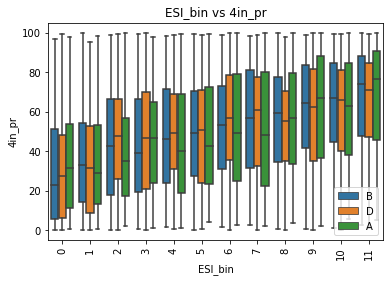

In [105]:
g = sns.boxplot(x='ESI_bin', y='4in_pr', data=final, hue='4insoils')
ax = plt.gca()
ax.set_title('ESI_bin vs 4in_pr')
plt.xticks(rotation=90)
ax.legend(loc='lower right')

In [106]:
final.set_index('Date', inplace=True)

In [107]:
goodmonths = final[(final.index.month>=5)&(final.index.month<=11)]

Text(0.5, 1.0, 'ESI Bins vs 4in Percentile Rank May-September')

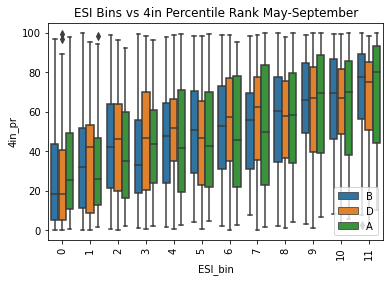

In [108]:
g = sns.boxplot(x='ESI_bin', y='4in_pr', data=goodmonths, hue='4insoils')
ax = plt.gca()
ax.set_title('ESI_bin vs 4in_pr')
plt.xticks(rotation=90)
ax.legend(loc='lower right')
ax.set_title('ESI Bins vs 4in Percentile Rank May-September')

In [109]:
final

,level_0,ESI,station,week_x,week_y,2inANOM,4inANOM,8inANOM,20inANOM,40inANOM,...,Category,Station Name,ESI_cumsum,ESI_pc,ESI_cumsum_pc,4inANOM_cumsum,4inpc,ESI_bin,ESI_cumsum_bin,4insoils
Date,,,,,,,,,,,,,,,,,,,,,
2002-04-02,2053:AL:SCAN4,-0.435,2053:AL:SCAN,14,14,0.724556,0.095368,0.720884,-0.133735,-0.241910,...,NaN,Wtars,-6.540,-130.938834,7.125307,-531.640691,-7.723911,3,"(-6.641, -5.548]",B
2002-04-09,2053:AL:SCAN4,-0.163,2053:AL:SCAN,15,15,0.318988,-0.067437,0.484996,-0.619942,0.189875,...,NaN,Wtars,-6.703,-62.528736,2.492355,-538.384394,-10.863758,5,"(-8.08, -6.641]",B
2002-04-16,2053:AL:SCAN4,-0.484,2053:AL:SCAN,16,16,0.158151,0.072646,0.665487,-0.431747,0.349802,...,NaN,Wtars,-7.187,196.932515,7.220647,-531.119776,10.439560,3,"(-8.08, -6.641]",B
2002-04-23,2053:AL:SCAN4,-1.498,2053:AL:SCAN,17,17,-0.756754,-0.837206,0.346158,-0.322725,0.079589,...,0.0,Wtars,-8.685,209.504132,20.843189,-614.840350,-59.113523,0,"(-9.831, -8.08]",B
2002-04-30,2053:AL:SCAN4,0.554,2053:AL:SCAN,18,18,-0.873574,-1.832470,0.071150,-0.237434,0.021554,...,0.0,Wtars,-8.131,-136.982644,-6.378814,-798.087335,-85.896018,8,"(-9.831, -8.08]",B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-19,2181:AL:SCAN2,-1.245,2181:AL:SCAN,7,7,-1.391765,-0.880697,-1.029576,-0.904181,-0.816375,...,NaN,Perdido Riv Farms,-5.776,-17.275748,27.477378,821.743634,-79.950553,1,"(-6.641, -5.548]",A
2017-02-26,2181:AL:SCAN2,-1.290,2181:AL:SCAN,8,8,-0.508383,0.620348,-1.312816,0.141193,-0.208365,...,NaN,Perdido Riv Farms,-7.066,3.614458,22.333795,883.778425,262.125661,1,"(-8.08, -6.641]",A
2018-02-05,2181:AL:SCAN2,-0.247,2181:AL:SCAN,6,6,-0.398190,-0.190989,0.416556,NaN,NaN,...,2.0,Perdido Riv Farms,3.484,-52.408478,-6.620209,-234.802365,-23.364289,4,"(3.115, 3.731]",A


In [110]:
categories = final[['ESI_bin', '2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC','40inSMSDC', 'Category', 'station', '4insoils']]

In [111]:
categories['ESI_bin'] = categories['ESI_bin'].astype(int)

/var/folders/y9/hh5gbzrj2yb99_tywtn0r8s80000gn/T/ipykernel_20482/887033803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories['ESI_bin'] = categories['ESI_bin'].astype(int)


In [112]:
categories[(categories.index.year==2019)&(categories['station']=='2057:AL:SCAN')]

,ESI_bin,2inSMSDC,4inSMSDC,8inSMSDC,20inSMSDC,40inSMSDC,Category,station,4insoils
Date,,,,,,,,,
2019-04-02,3,2.0,NaN,NaN,NaN,NaN,NaN,2057:AL:SCAN,D
2019-04-09,9,NaN,NaN,NaN,NaN,NaN,NaN,2057:AL:SCAN,D
2019-04-16,8,NaN,NaN,NaN,NaN,NaN,NaN,2057:AL:SCAN,D
2019-04-23,8,NaN,NaN,NaN,NaN,NaN,NaN,2057:AL:SCAN,D
2019-04-30,3,0.0,NaN,NaN,NaN,NaN,NaN,2057:AL:SCAN,D
2019-06-04,1,1.0,NaN,NaN,NaN,NaN,0.0,2057:AL:SCAN,D
2019-06-18,6,0.0,NaN,NaN,NaN,NaN,0.0,2057:AL:SCAN,D
2019-07-02,8,0.0,NaN,NaN,NaN,NaN,0.0,2057:AL:SCAN,D
2019-07-09,4,1.0,NaN,NaN,NaN,NaN,0.0,2057:AL:SCAN,D


In [113]:
combined.columns

Index(['ESI', 'station', 'week_x', 'week_y', '2inANOM', '4inANOM', '8inANOM',
       '20inANOM', '40inANOM', '2in_pr', '4in_pr', '8in_pr', '20in_pr',
       '40in_pr', '2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC',
       'point', 'Category', 'Station Name'],
      dtype='object')

In [114]:
test = combined[(combined['station']=='2078:AL:SCAN')&(combined.index.month>=5)&(combined.index.month<=11)]

/var/folders/y9/hh5gbzrj2yb99_tywtn0r8s80000gn/T/ipykernel_20482/602000393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/var/folders/y9/hh5gbzrj2yb99_tywtn0r8s80000gn/T/ipykernel_20482/602000393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['4inANOM_cumsum'] = yearFrame['4inANOM'].cumsum()


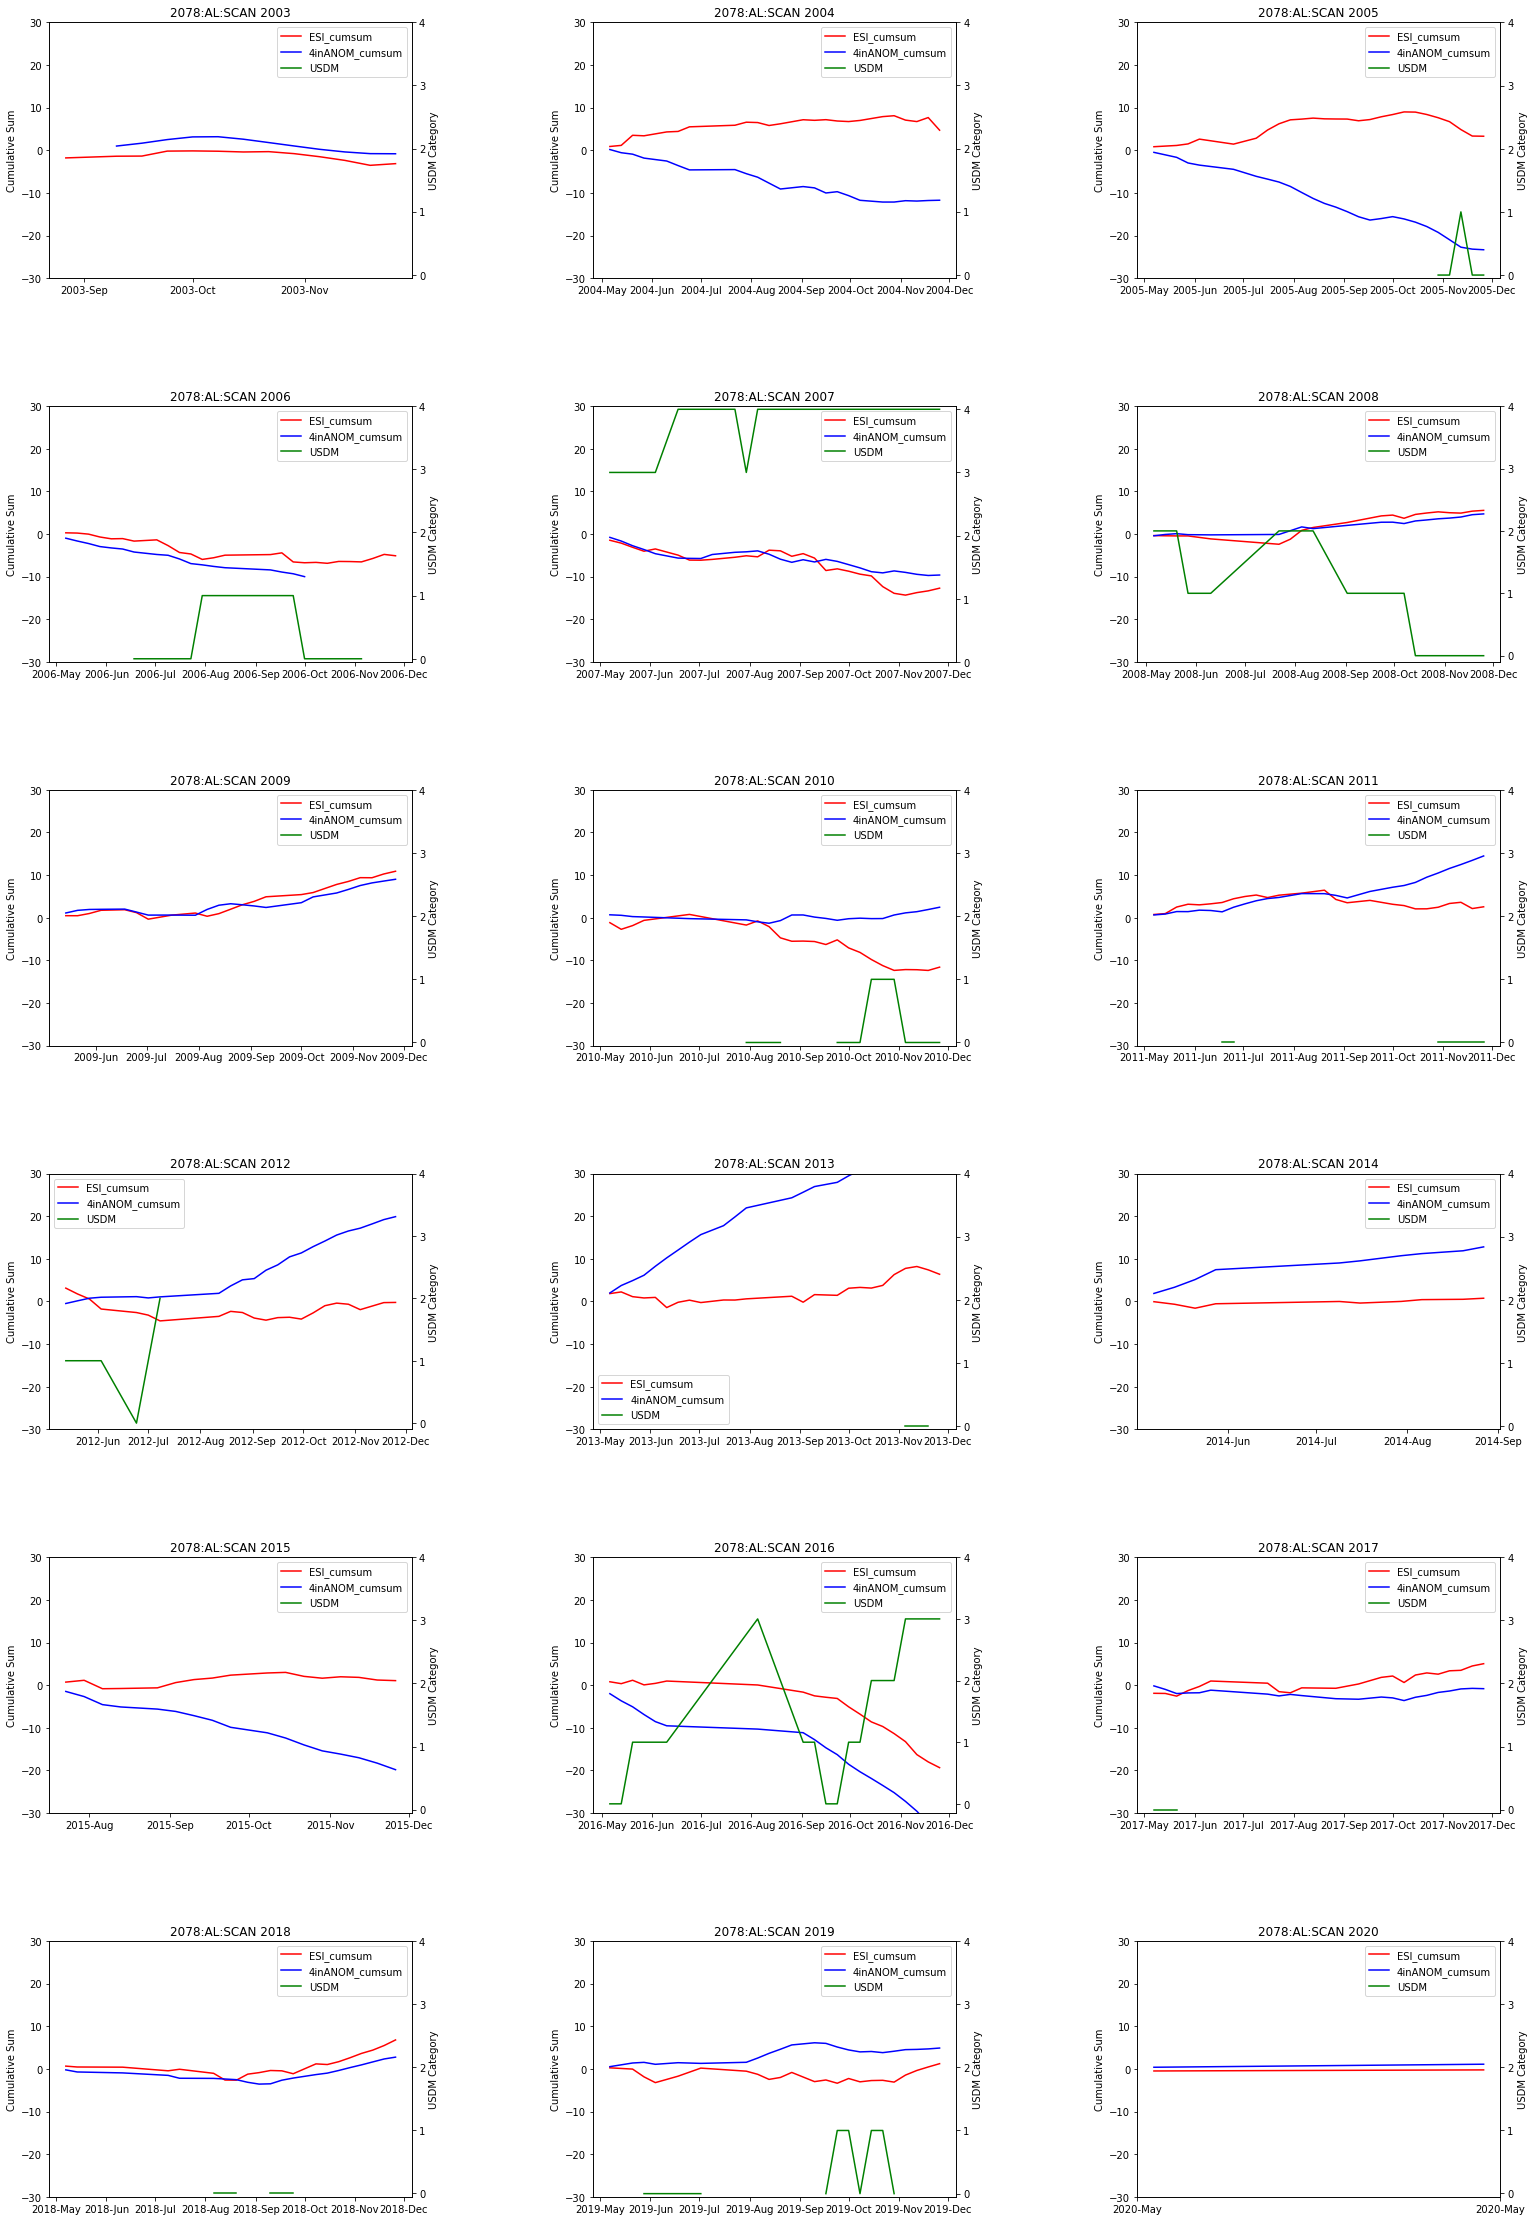

In [137]:
fig, ax = plt.subplots(figsize=(26,40), nrows=6, ncols=3)
axes = ax.flatten()
count=0
for y in test.index.year.unique():
    yearFrame = test[test.index.year==y]
    yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
    yearFrame['4inANOM_cumsum'] = yearFrame['4inANOM'].cumsum()
    ESI_h, = axes[count].plot(yearFrame['ESI_cumsum'], label='ESI_cumsum', color='red')
    axes[count].set_ylabel('Cumulative Sum')
    axes[count].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axes[count].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    ANOM4in_h, = axes[count].plot(yearFrame['4inANOM_cumsum'], label='4inANOM_cumsum', color='blue')
    axes[count].set_ylim(-30,30)
    
    axes2 = axes[count].twinx()
    USDM_h, = axes2.plot(yearFrame['Category'], label='USDM', color='green')
    
    axes2.set_yticks([0,1,2,3,4])
    axes2.set_ylabel('USDM Category')
    
    axes[count].set_title('2078:AL:SCAN ' + str(y))
    axes[count].legend(handles=[ESI_h, ANOM4in_h, USDM_h])
    count+=1
plt.subplots_adjust(hspace=0.5, wspace=0.5)

/var/folders/y9/hh5gbzrj2yb99_tywtn0r8s80000gn/T/ipykernel_20482/2943343103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()


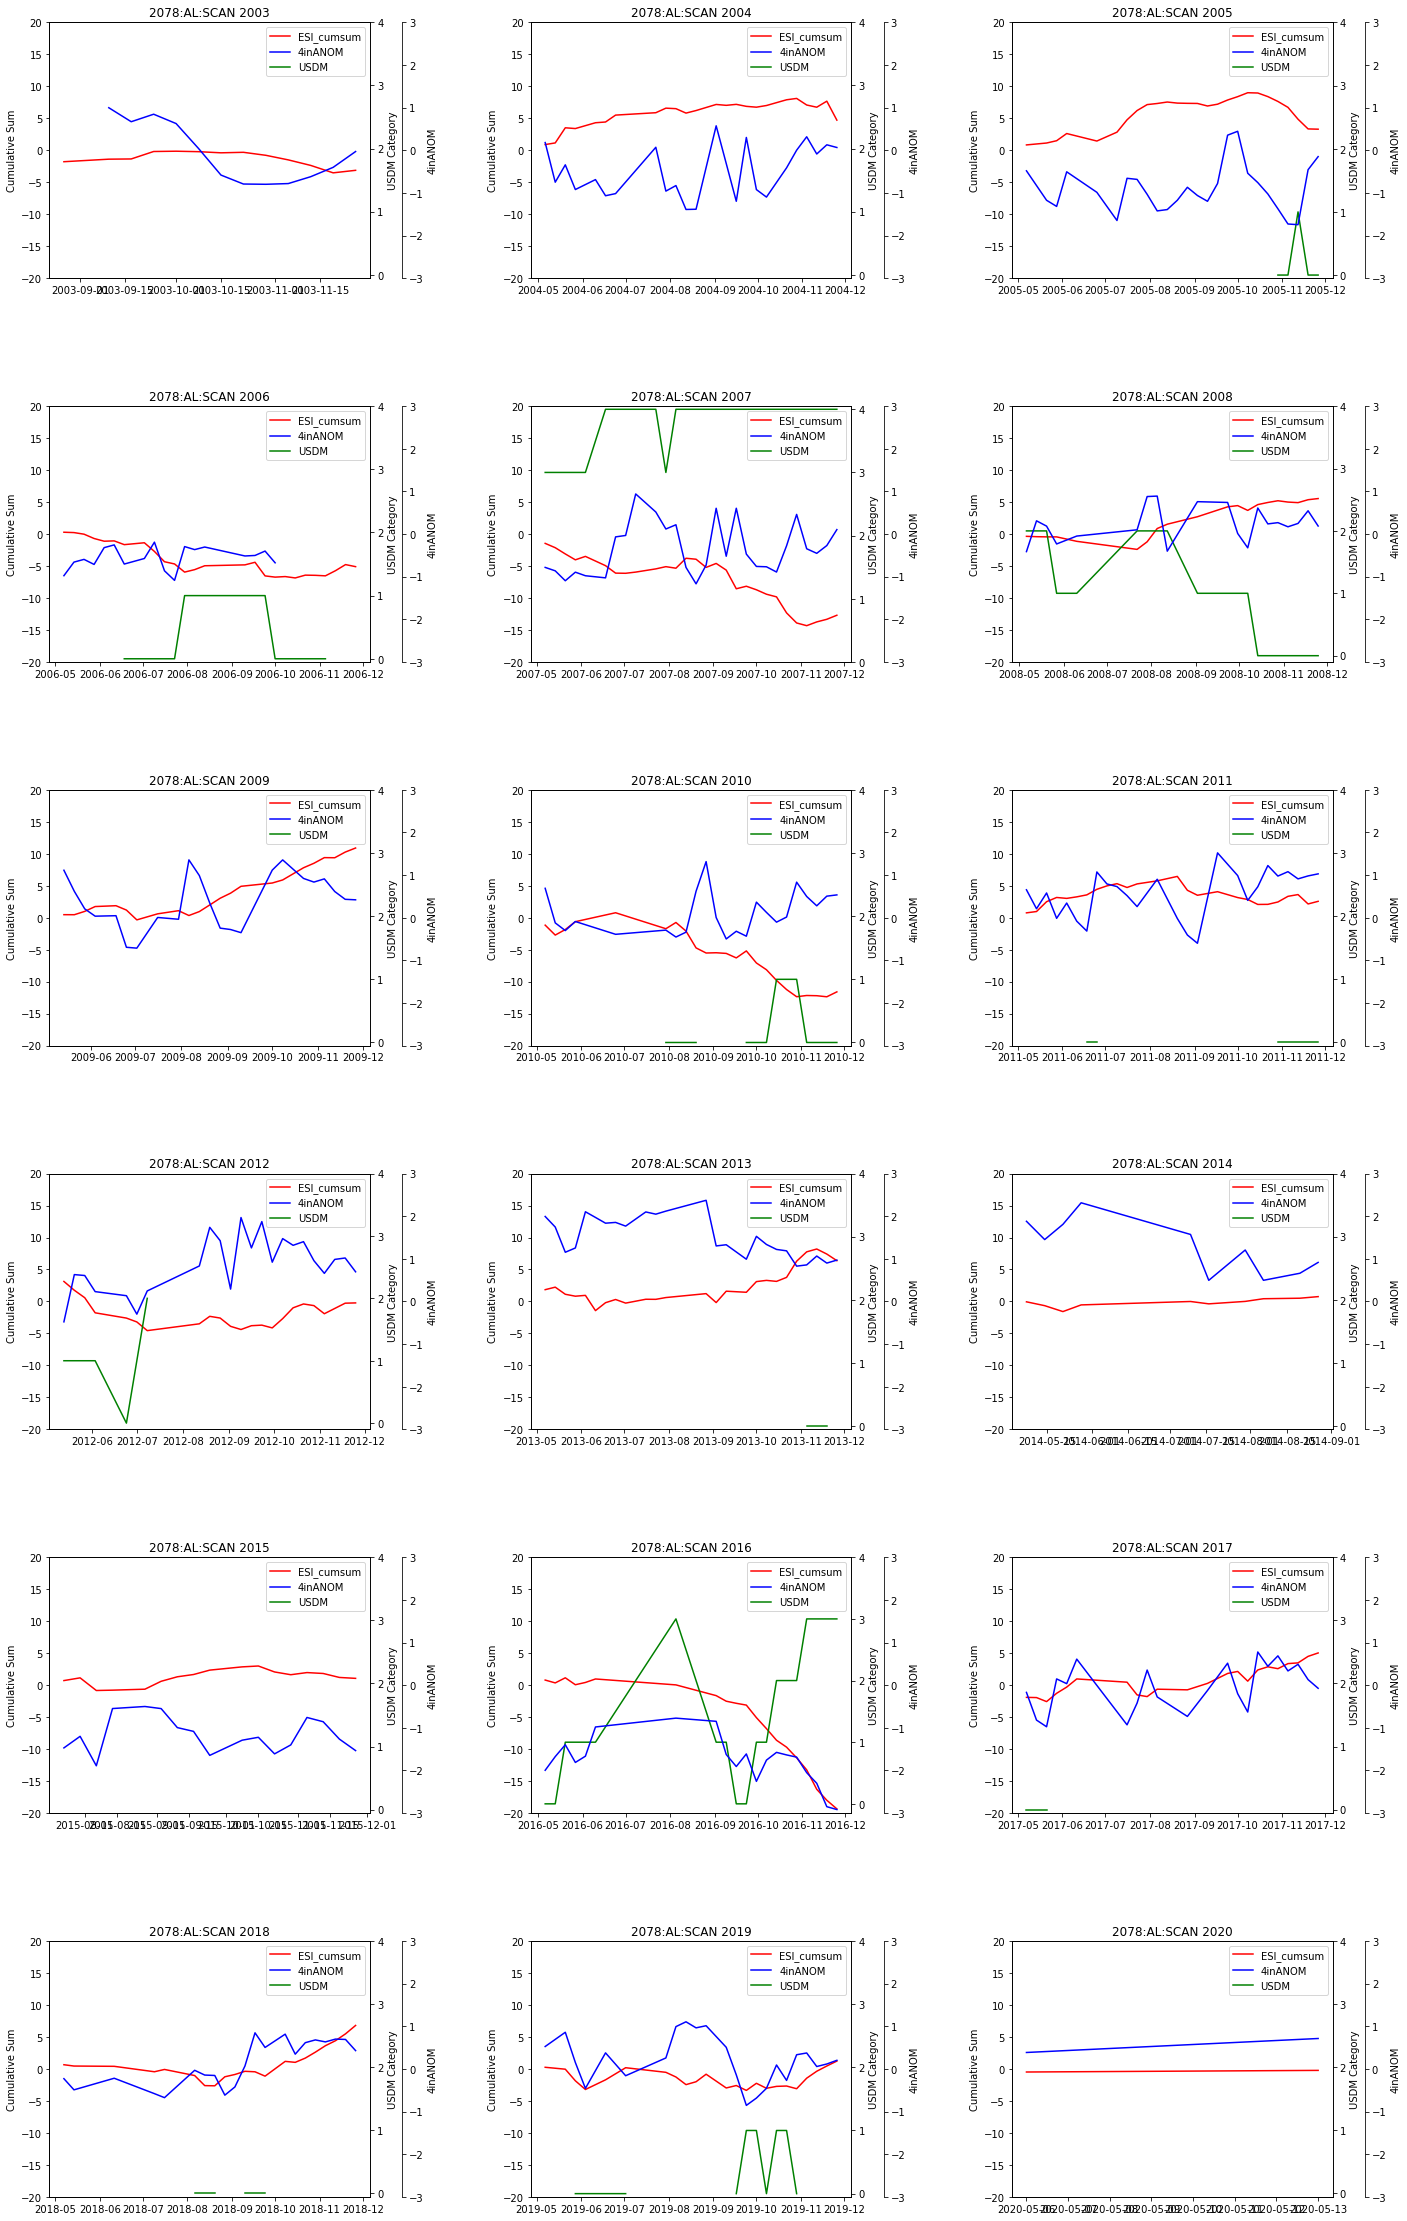

In [134]:
fig, ax = plt.subplots(figsize=(23,40), nrows=6, ncols=3)
axes = ax.flatten()
count=0
for y in test.index.year.unique():
    yearFrame = test[test.index.year==y]
    yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
    ESI_h, = axes[count].plot(yearFrame['ESI_cumsum'], label='ESI_cumsum', color='red')
    axes[count].set_ylabel('Cumulative Sum')
    axes[count].set_ylim(-20, 20)
    
    axes2 = axes[count].twinx()
    USDM_h, = axes2.plot(yearFrame['Category'], label='USDM', color='green')
    axes2.set_ylabel('USDM Category')
    axes2.set_yticks([0,1,2,3,4])
    
    axes3 = axes[count].twinx()
    axes3.spines.right.set_position(("axes", 1.1))
    ANOM4in_h, = axes3.plot(yearFrame['4inANOM'], label='4inANOM', color='blue')
    axes3.set_ylabel('4inANOM')
    axes3.set_ylim(-3, 3)
        
    axes[count].set_title('2078:AL:SCAN ' + str(y))
    axes[count].legend(handles=[ESI_h, ANOM4in_h, USDM_h])
    count+=1
plt.subplots_adjust(hspace=0.5, wspace=0.5)